In [68]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



In [69]:
'''plt.rcParams.update({
    "text.usetex": False,                # Use LaTeX for all text
    "font.family": "serif",             # Use a serif font family (LaTeX default)
    "mathtext.fontset": "cm",   # Computer Modern for math
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})'''

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.serif": []
})


In [70]:
# set path to compustat csv file:
clean_csv_path = "/Users/songyi/Documents/st310/st310_groupproject/ST310-Predicting-Company-Bankruptcy/notebooks/test_set.csv"
clean_df_1980 = pd.read_csv(clean_csv_path)
clean_df_1980.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 97 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   gvkey                                            36285 non-null  int64  
 1   datadate                                         36285 non-null  object 
 2   fyear                                            36285 non-null  int64  
 3   conm                                             36285 non-null  object 
 4   tic                                              36284 non-null  object 
 5   naicsh                                           34788 non-null  float64
 6   revt                                             36285 non-null  float64
 7   cogs                                             36285 non-null  float64
 8   ebit                                             36151 non-null  float64
 9   oibdp                       

In [71]:

print(clean_df_1980.columns.tolist())


['gvkey', 'datadate', 'fyear', 'conm', 'tic', 'naicsh', 'revt', 'cogs', 'ebit', 'oibdp', 're', 'ni', 'xint', 'dp', 'at', 'act', 'che', 'rect', 'invt', 'lt', 'lct', 'dlc', 'dltt', 'ceq', 'csho', 'oancf', 'capx', 'fincf', 'ivncf', 'dv', 'prcc_f', 'at_fn', 'TL_flag', 'gross_margin', 'net_profit_margin', 'roa', 'roe', 'asset_turnover', 'cash_to_assets', 'fixed_asset_intensity', 'net_working_capital_to_assets', 'capex_to_assets', 'current_ratio', 'quick_ratio', 'total_debt', 'debt_to_assets', 'debt_to_equity', 'liabilities_to_assets', 'interest_coverage', 'long_term_debt_ratio', 'book_value_per_share', 'earnings_per_share', 'dividend_payout_ratio', 'dividend_yield', 'retention_ratio', 'market_capitalization', 'free_cash_flow_to_sales', 'financing_cash_flow_to_assets', 'investing_cash_flow_to_assets', 'days_sales_outstanding', 'days_inventory_outstanding', 'revt_1_year_pct_change', 'at_1_year_pct_change', 'ni_1_year_pct_change', 'oibdp_1_year_pct_change', 'ceq_1_year_pct_change', 'total_debt

In [72]:
pd.set_option('display.max_columns', None)
clean_df_1980.tail()

,gvkey,datadate,fyear,conm,tic,naicsh,revt,cogs,ebit,oibdp,re,ni,xint,dp,at,act,che,rect,invt,lt,lct,dlc,dltt,ceq,csho,oancf,capx,fincf,ivncf,dv,prcc_f,at_fn,TL_flag,gross_margin,net_profit_margin,roa,roe,asset_turnover,cash_to_assets,fixed_asset_intensity,net_working_capital_to_assets,capex_to_assets,current_ratio,quick_ratio,total_debt,debt_to_assets,debt_to_equity,liabilities_to_assets,interest_coverage,long_term_debt_ratio,book_value_per_share,earnings_per_share,dividend_payout_ratio,dividend_yield,retention_ratio,market_capitalization,free_cash_flow_to_sales,financing_cash_flow_to_assets,investing_cash_flow_to_assets,days_sales_outstanding,days_inventory_outstanding,revt_1_year_pct_change,at_1_year_pct_change,ni_1_year_pct_change,oibdp_1_year_pct_change,ceq_1_year_pct_change,total_debt_1_year_pct_change,capx_1_year_pct_change,market_capitalization_1_year_pct_change,free_cash_flow_to_sales_1_year_pct_change,financing_cash_flow_to_assets_1_year_pct_change,revt_2_year_pct_change,at_2_year_pct_change,ni_2_year_pct_change,oibdp_2_year_pct_change,ceq_2_year_pct_change,total_debt_2_year_pct_change,capx_2_year_pct_change,market_capitalization_2_year_pct_change,free_cash_flow_to_sales_2_year_pct_change,financing_cash_flow_to_assets_2_year_pct_change,revt_5_year_pct_change,at_5_year_pct_change,ni_5_year_pct_change,oibdp_5_year_pct_change,ceq_5_year_pct_change,total_debt_5_year_pct_change,capx_5_year_pct_change,market_capitalization_5_year_pct_change,free_cash_flow_to_sales_5_year_pct_change,financing_cash_flow_to_assets_5_year_pct_change,naics_2_digit,naics_industry_group,default_next_1y,default_next_2y,default_past_3y_plus,default_ever_future
36280,145308,2013-12-31,2013,WW INTERNATIONAL INC,WW,812191.0,0.906817,0.730654,1.254478,1.119821,1.411727,1.235241,1.404212,0.594217,0.722898,0.569532,0.976450,0.123532,0.472060,1.228022,0.811994,0.611567,1.489385,-3.135218,0.471034,1.104653,0.499783,-1.170017,-0.881289,1.119715,0.970578,NaN,0,0.147181,0.143227,0.235391,-0.047020,0.168706,-0.171222,0.920272,0.003516,-0.444136,-0.494978,-0.211675,1.427854,2.695775,-0.638008,1.139504,0.014185,4.035104,-0.258676,0.099444,-0.015964,-0.642815,0.064300,0.863116,0.143147,-0.385276,-0.150648,-0.414513,-0.470370,-0.336012,-0.121462,0.053365,-0.039837,-0.115163,-0.201293,-0.306919,-0.532788,0.067866,-0.025931,-0.300103,-0.172348,0.039604,-0.082542,-0.796611,-0.086881,-0.089293,-0.513004,0.059069,-0.001861,-0.266053,-0.265283,0.051125,-0.121169,-0.317226,-0.215259,-0.113269,-0.344959,0.084949,0.007384,81.0,Administrative,0.0,0.0,0.0,0.0
36281,10507,2008-12-31,2008,ENERGY FUTURE HOLDINGS CORP,0033A,2211.0,1.639444,1.689624,1.734095,1.744398,-1.888883,-2.286520,2.867692,2.303314,2.178349,1.900565,2.028292,1.668773,1.453971,2.405650,2.155198,2.456053,2.219894,-3.135218,2.493329,1.578617,2.438769,2.039856,-1.738834,-0.600023,NaN,NaN,0,0.150640,0.086895,0.044306,1.520634,-1.005553,-0.624108,1.338934,0.008712,-0.161709,-0.492150,-0.309012,2.308519,0.737236,-3.595774,0.267050,-0.007213,1.680620,-0.157186,-0.471748,-0.258762,-0.365115,0.267157,NaN,0.122045,-0.205046,0.331958,-0.234923,-0.480237,0.140410,-0.334968,-2.107652,0.241336,-0.809748,-0.188973,-0.260374,NaN,0.091519,-0.152521,-0.265897,0.262915,-0.444984,-0.126809,-0.808432,0.026331,-0.197354,NaN,-0.061710,0.030049,-0.276109,-0.156662,-1.124234,-0.077764,-0.430621,-0.165307,-0.066980,NaN,-0.036611,0.058931,22.0,Capital Intensive,0.0,0.0,0.0,0.0
36282,12378,1988-06-30,1988,CHAUS (BERNARD) INC,3CHBD,31523.0,0.190709,0.304389,-1.461539,-1.654438,0.402229,-1.018024,-0.408644,-0.637041,-0.331886,-0.003612,-1.112764,0.019540,0.464013,-0.409650,-0.330870,-0.871123,-0.234289,0.018635,-0.223014,0.191350,-0.627773,-0.729204,0.441452,-0.600023,-0.350761,NaN,0,0.123100,0.134142,0.074179,-0.083078,2.111544,-0.750462,-1.658562,0.297670,-0.472864,0.365863,-0.401087,-0.374170,-0.364284,-0.094552,-0.256548,-0.046559,-0.186342,-0.136277,-0.152982,-0.258762,-0.365115,0.267157,-0.304609,0.134890,-0.616832,0.349219,-0.2406

# pre-process data

# feature selection

In [73]:
# select feature columns for KNN model
liquidity_ratios = ['current_ratio', 'quick_ratio', 
                    'net_working_capital_to_assets'
                    ]
leverage_ratios = ['debt_to_equity', 'liabilities_to_assets', 'interest_coverage', 'total_debt', 'debt_to_assets']
marketvalue_ratios = ['book_value_per_share', 'earnings_per_share', 'dividend_payout_ratio', 'dividend_yield', 'retention_ratio']
profitability_ratios = ['gross_margin', 'net_profit_margin', 'roa', 'roe']
efficiency_ratios = ['asset_turnover', 
                    'capex_to_assets', 'days_sales_outstanding', 'days_inventory_outstanding' 
                     ]
cashflow_ratios = ['free_cash_flow_to_sales', 'financing_cash_flow_to_assets', 'investing_cash_flow_to_assets']
feature_cols = liquidity_ratios + leverage_ratios + marketvalue_ratios + profitability_ratios + efficiency_ratios + cashflow_ratios

# create X and y dataframes
X = clean_df_1980[feature_cols].copy()
# y = clean_df_1980[['default_next_1y']].copy()
y = clean_df_1980[['default_next_1y']].copy()

# drop rows with undefined X and y
mask = (
    y['default_next_1y'].notnull()
    & X.notnull().all(axis=1)
)

X = X.loc[mask]
y = y.loc[mask]

X_df = X.copy()

X = X.to_numpy()
y = y.to_numpy().ravel()

print(len(X))
print(len(y))




36285
36285


In [74]:
# Compute correlation matrix (Pearson)
ordered_cols = (
    liquidity_ratios
    + leverage_ratios
    + marketvalue_ratios
    + profitability_ratios
    + efficiency_ratios
    + cashflow_ratios
)

corr_matrix = clean_df_1980[ordered_cols].dropna().corr()

corr_matrix


,current_ratio,quick_ratio,net_working_capital_to_assets,debt_to_equity,liabilities_to_assets,interest_coverage,total_debt,debt_to_assets,book_value_per_share,earnings_per_share,dividend_payout_ratio,dividend_yield,retention_ratio,gross_margin,net_profit_margin,roa,roe,asset_turnover,capex_to_assets,days_sales_outstanding,days_inventory_outstanding,free_cash_flow_to_sales,financing_cash_flow_to_assets,investing_cash_flow_to_assets
current_ratio,1.000000,0.920391,0.145167,-0.029376,-0.202657,-0.069528,-0.238584,-0.214705,-0.038237,-0.036482,-0.053714,-0.068578,0.049186,-0.088763,-0.071268,0.074920,-0.018238,-0.160557,-0.100824,0.100925,0.130859,-0.105546,0.040041,-0.014796
quick_ratio,0.920391,1.000000,0.091863,-0.030005,-0.132343,-0.124617,-0.212230,-0.145636,-0.034838,-0.037664,-0.053729,-0.062311,0.048784,-0.145017,-0.127365,0.021981,-0.029346,-0.235651,-0.062897,0.095520,0.021637,-0.160238,0.119516,-0.035972
net_working_capital_to_assets,0.145167,0.091863,1.000000,0.027704,-0.816992,0.015679,0.056617,-0.614601,0.008364,0.009644,0.016688,0.024974,-0.017592,0.168258,0.202872,0.727861,-0.043390,-0.104166,-0.008586,0.001093,0.034425,0.111341,-0.489417,-0.016485
debt_to_equity,-0.029376,-0.030005,0.027704,1.000000,-0.045343,0.001487,0.112961,-0.023972,0.065597,0.019500,0.019294,0.229976,-0.019140,0.026512,0.026923,0.040330,-0.265168,-0.027397,0.003360,-0.018843,-0.021372,0.023288,-0.046453,-0.023708
liabilities_to_assets,-0.202657,-0.132343,-0.816992,-0.045343,1.000000,-0.033705,-0.038764,0.843541,-0.016032,-0.023556,-0.035411,-0.047123,0.034294,-0.189489,-0.220354,-0.701843,0.070027,0.143293,-0.029529,0.005771,-0.023143,-0.132759,0.556916,0.054073
interest_coverage,-0.069528,-0.124617,0.015679,0.001487,-0.033705,1.000000,0.044510,-0.017231,0.008751,0.030213,0.042212,0.060910,-0.039657,0.179313,0.163973,0.108923,0.067585,0.109560,0.027584,-0.122915,-0.031491,0.168545,-0.157163,-0.030471
total_debt,-0.238584,-0.212230,0.056617,0.112961,-0.038764,0.044510,1.000000,0.118303,0.119060,0.114979,0.172163,0.232931,-0.172161,0.126850,0.122916,0.155497,0.053349,-0.190052,0.004403,-0.103660,-0.101947,0.113904,-0.242186,-0.021821
debt_to_assets,-0.214705,-0.145636,-0.614601,-0.023972,0.843541,-0.017231,0.118303,1.000000,-0.007110,-0.023261,-0.025614,-0.039013,0.018972,-0.145298,-0.173703,-0.505054,0.066564,0.051323,-0.013157,-0.002584,-0.021660,-0.104970,0.444950,0.036098
book_value_per_share,-0.038237,-0.034838,0.008364,0.065597,-0.016032,0.008751,0.119060,-0.007110,1.000000,0.647444,0.059399,0.062452,-0.051904,0.021712,0.021308,0.024769,0.009276,-0.045957,0.000132,-0.015033,-0.031719,0.020080,-0.041069,0.003185
earnings_per_share,-0.036482,-0.037664,0.009644,0.019500,-0.023556,0.030213,0.114979,-0.023261,0.647444,1.000000,0.109902,0.096004,-0.094891,0.030900,0.032110,0.039551,0.029947,-0.013258,0.011010,-0.021623,-0.028564,0.030097,-0.065533,0.006160


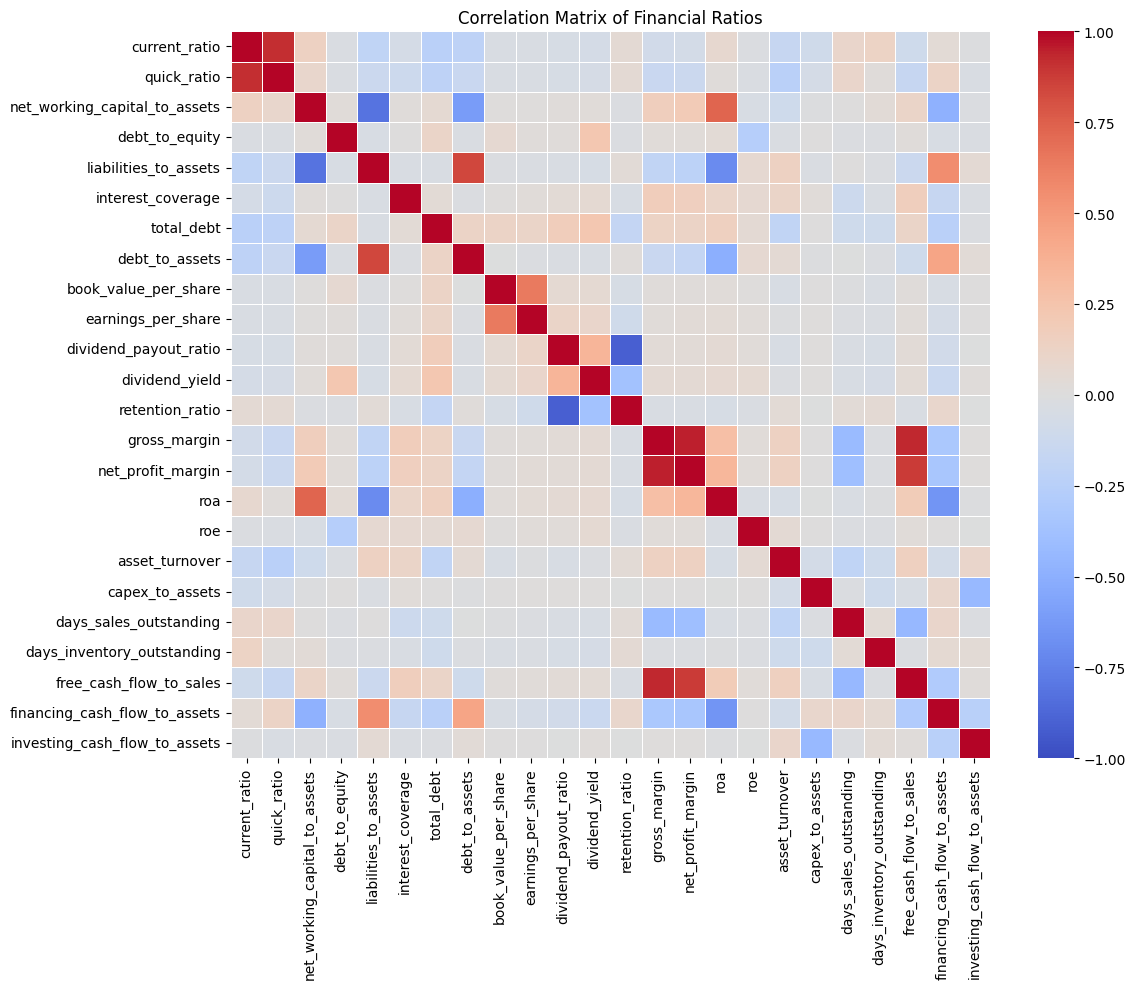

In [75]:
# correlation heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    annot=False,       
    linewidths=0.5
)

plt.title("Correlation Matrix of Financial Ratios")
plt.tight_layout()
plt.show()

In [76]:
# identify highly correlated pairs
corr_threshold = 0.8

high_corr_pairs = (
    corr_matrix
    .abs()
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ["Ratio 1", "Ratio 2", "Abs Correlation"]

high_corr_pairs = high_corr_pairs[high_corr_pairs["Abs Correlation"] > corr_threshold]

high_corr_pairs.sort_values("Abs Correlation", ascending=False)

,Ratio 1,Ratio 2,Abs Correlation
221,gross_margin,net_profit_margin,0.948967
228,gross_margin,free_cash_flow_to_sales,0.931891
0,current_ratio,quick_ratio,0.920391
186,dividend_payout_ratio,retention_ratio,0.909996
237,net_profit_margin,free_cash_flow_to_sales,0.880839
88,liabilities_to_assets,debt_to_assets,0.843541
46,net_working_capital_to_assets,liabilities_to_assets,0.816992


# KNN classification with 5-fold stratified cross-validation

In [100]:
# ================================================================
# NESTED CROSS-VALIDATION FOR KNN WITH THRESHOLD CALIBRATION
# ================================================================
#
# This block implements a *nested cross-validation* procedure to
# evaluate KNN classifiers when the classification threshold is
# chosen to satisfy a fixed recall (sensitivity) constraint.
#
# Key idea:
#   The probability threshold is a data-dependent hyperparameter
#   (just like k). If it is tuned on the same data used for
#   evaluation, performance estimates become optimistically biased.
#   Nested CV prevents this by separating threshold calibration
#   from performance evaluation.
#
# Structure:
#   For each candidate k:
#     - OUTER CV (performance estimation):
#         Estimates out-of-sample performance of the full procedure
#         (training + threshold calibration + classification).
#
#     - INNER CV (threshold calibration):
#         Chooses a probability threshold that achieves the target
#         recall using only the outer training data.
#
# Inner loop (calibration):
#   For each inner split:
#     1) Fit the KNN model on inner training data
#     2) Predict probabilities on inner calibration data
#     3) Select the threshold that attains the target recall
#
#   The thresholds from inner splits are averaged to obtain a
#   stable threshold for the current outer fold.
#
# Outer loop (evaluation):
#   The model is refit on the full outer training set and evaluated
#   on the outer validation set using the calibrated threshold.
#   Outer validation labels are never used for threshold selection.
#
# Validity:
#   - Threshold selection is isolated from evaluation data
#   - Each outer fold mimics a real train–calibrate–deploy workflow
#   - Performance metrics are unbiased estimates of generalization
#
# Outputs:
#   - Mean CV performance metrics across outer folds
#   - Mean and standard deviation of calibrated thresholds
#   - Standard errors reflecting uncertainty across outer folds
#
# This procedure avoids optimism and yields statistically valid
# performance estimates under a fixed-recall classification rule.
# ================================================================


## 1. with recall threshold at least 0.20

In [77]:
# ----------------------------
# threshold helper
# ----------------------------

def threshold_for_target_recall(y_true, probs, target=0.20):
    """
    Find the highest threshold such that recall >= target.
    """
    ts = np.unique(probs)
    for t in ts[::-1]:  # iterate from high to low
        y_hat = (probs >= t).astype(int)
        if recall_score(y_true, y_hat, zero_division=0) >= target:
            return t
    return 1.0  # fallback: predict no bankruptcies


In [ ]:
# ============================================================
# NESTED CV over k:
# - Outer CV: evaluate metrics (no threshold leakage)
# - Inner CV (inside each outer train fold): choose threshold
#   that targets recall >= target_recall
# - For each k: store mean metrics + SE across OUTER folds
#   and also store avg threshold across OUTER folds (useful for test set)
# ============================================================

# SETTINGS
n_splits_outer = 5
n_splits_inner = 3
k_values = np.arange(1, 31, 2)
target_recall = 0.20
random_state = 42

outer_cv = StratifiedKFold(n_splits=n_splits_outer, shuffle=True, random_state=random_state)

all_outer_details = []   # per-(k, outer_fold) metrics + chosen threshold
results = []             # per-k means
se_rows = []             # per-k SEs



In [79]:

def se(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if len(x) <= 1:
        return np.nan
    return np.std(x, ddof=1) / np.sqrt(len(x))


for k in k_values:
    print("\n" + "="*60)
    print(f"Nested CV for k = {k} | target recall = {target_recall}")
    print("="*60)

    # store per-outer-fold metrics for this k
    outer_fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}
    outer_fold_thresholds = []

    for outer_fold, (tr_outer_idx, val_outer_idx) in enumerate(outer_cv.split(X, y), start=1):
        X_tr_outer, X_val_outer = X[tr_outer_idx], X[val_outer_idx]
        y_tr_outer, y_val_outer = y[tr_outer_idx], y[val_outer_idx]

        # ----------------------------
        # INNER CV: choose threshold on inner calibration folds
        # ----------------------------
        inner_cv = StratifiedKFold(n_splits=n_splits_inner, shuffle=True, random_state=random_state)

        inner_thresholds = []
        for tr_inner_idx, cal_inner_idx in inner_cv.split(X_tr_outer, y_tr_outer):
            X_tr_inner, X_cal = X_tr_outer[tr_inner_idx], X_tr_outer[cal_inner_idx]
            y_tr_inner, y_cal = y_tr_outer[tr_inner_idx], y_tr_outer[cal_inner_idx]

            scaler = StandardScaler()
            X_tr_inner_s = scaler.fit_transform(X_tr_inner)
            X_cal_s      = scaler.transform(X_cal)

            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_tr_inner_s, y_tr_inner)

            p_cal = model.predict_proba(X_cal_s)[:, 1]
            thr = threshold_for_target_recall(y_cal, p_cal, target=target_recall)
            inner_thresholds.append(thr)

        # threshold for this OUTER fold: average of inner thresholds
        thr_outer = float(np.mean(inner_thresholds))
        outer_fold_thresholds.append(thr_outer)

        # ----------------------------
        # OUTER evaluation: fit on full outer train, score on outer val using thr_outer
        # ----------------------------
        scaler = StandardScaler()
        X_tr_outer_s  = scaler.fit_transform(X_tr_outer)
        X_val_outer_s = scaler.transform(X_val_outer)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_tr_outer_s, y_tr_outer)

        p_val = model.predict_proba(X_val_outer_s)[:, 1]
        y_hat = (p_val >= thr_outer).astype(int)

        fold_acc = accuracy_score(y_val_outer, y_hat)
        fold_rec = recall_score(y_val_outer, y_hat, zero_division=0)
        fold_pre = precision_score(y_val_outer, y_hat, zero_division=0)
        fold_f1  = f1_score(y_val_outer, y_hat, zero_division=0)

        try:
            fold_auc = roc_auc_score(y_val_outer, p_val)
        except ValueError:
            fold_auc = np.nan

        outer_fold_metrics["acc"].append(fold_acc)
        outer_fold_metrics["recall"].append(fold_rec)
        outer_fold_metrics["precision"].append(fold_pre)
        outer_fold_metrics["f1"].append(fold_f1)
        outer_fold_metrics["auc"].append(fold_auc)

        all_outer_details.append({
            "k": k,
            "outer_fold": outer_fold,
            "thr_outer": thr_outer,
            "val_acc": fold_acc,
            "val_recall": fold_rec,
            "val_precision": fold_pre,
            "val_f1": fold_f1,
            "val_auc": fold_auc
        })

        print(
            f"Outer fold {outer_fold} | thr={thr_outer:.4f} | "
            f"Acc={fold_acc:.3f} Recall={fold_rec:.3f} Prec={fold_pre:.3f} "
            f"F1={fold_f1:.3f} AUC={fold_auc:.3f}"
        )

    # ----------------------------
    # Per-k summary (means across OUTER folds)
    # ----------------------------
    cv_acc_mean = float(np.nanmean(outer_fold_metrics["acc"]))
    cv_rec_mean = float(np.nanmean(outer_fold_metrics["recall"]))
    cv_pre_mean = float(np.nanmean(outer_fold_metrics["precision"]))
    cv_f1_mean  = float(np.nanmean(outer_fold_metrics["f1"]))
    cv_auc_mean = float(np.nanmean(outer_fold_metrics["auc"]))

    thr_mean = float(np.mean(outer_fold_thresholds))
    thr_sd   = float(np.std(outer_fold_thresholds, ddof=1)) if len(outer_fold_thresholds) > 1 else np.nan

    results.append([k, cv_acc_mean, cv_rec_mean, cv_pre_mean, cv_f1_mean, cv_auc_mean, thr_mean, thr_sd])

    # ----------------------------
    # Per-k SEs across OUTER folds
    # ----------------------------
    se_rows.append([
        k,
        se(outer_fold_metrics["acc"]),
        se(outer_fold_metrics["recall"]),
        se(outer_fold_metrics["precision"]),
        se(outer_fold_metrics["f1"]),
        se(outer_fold_metrics["auc"]),
    ])

    print(
        f"\nMean (outer CV) k={k}: "
        f"Acc={cv_acc_mean:.3f} Recall={cv_rec_mean:.3f} Prec={cv_pre_mean:.3f} "
        f"F1={cv_f1_mean:.3f} AUC={cv_auc_mean:.3f} | "
        f"thr_mean={thr_mean:.4f} (thr_sd={thr_sd:.4f})"
    )

# ----------------------------
# Build results_df (means + threshold summary)
# ----------------------------
results_df = pd.DataFrame(
    results,
    columns=["k", "CV_Acc", "CV_Recall", "CV_Precision", "CV_F1", "CV_AUC", "Thr_Mean", "Thr_SD"]
)

# ----------------------------
# Build SE df and merge
# ----------------------------
se_df = pd.DataFrame(
    se_rows,
    columns=["k", "CV_SE_Acc", "CV_SE_Recall", "CV_SE_Precision", "CV_SE_F1", "CV_SE_AUC"]
)

results_df = results_df.merge(se_df, on="k", how="left").sort_values("k").reset_index(drop=True)

results_df



Nested CV for k = 1 | target recall = 0.2
Outer fold 1 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.516
Outer fold 2 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.534
Outer fold 3 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.499
Outer fold 4 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.516
Outer fold 5 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.516

Mean (outer CV) k=1: Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.516 | thr_mean=0.0000 (thr_sd=0.0000)

Nested CV for k = 3 | target recall = 0.2
Outer fold 1 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.513
Outer fold 2 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.585
Outer fold 3 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.496
Outer fold 4 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0.548
Outer fold 5 | thr=0.0000 | Acc=0.004 Recall=1.000 Prec=0.004 F1=0.008 AUC=0

,k,CV_Acc,CV_Recall,CV_Precision,CV_F1,CV_AUC,Thr_Mean,Thr_SD,CV_SE_Acc,CV_SE_Recall,CV_SE_Precision,CV_SE_F1,CV_SE_AUC
0,1,0.003941,1.000000,0.003941,0.007851,0.516297,0.000000,0.000000,0.000034,0.000000,0.000034,0.000067,0.005571
1,3,0.003941,1.000000,0.003941,0.007851,0.537993,0.000000,0.000000,0.000034,0.000000,0.000034,0.000067,0.015463
2,5,0.199587,0.828571,0.010442,0.017908,0.556884,0.013333,0.029814,0.195625,0.171429,0.006480,0.010016,0.017242
3,7,0.393083,0.663054,0.014558,0.025135,0.568473,0.019048,0.026082,0.238294,0.206389,0.006685,0.010856,0.022683
4,9,0.585697,0.498030,0.017248,0.030133,0.583684,0.029630,0.030987,0.237507,0.206557,0.006444,0.010983,0.017231
5,11,0.582775,0.505172,0.015427,0.027584,0.592384,0.042424,0.040656,0.236316,0.204214,0.005720,0.010000,0.020313
6,13,0.964944,0.232020,0.027136,0.048530,0.600771,0.051282,0.018131,0.001385,0.046896,0.004512,0.008232,0.023125
7,15,0.960672,0.281281,0.028612,0.051875,0.623188,0.057778,0.012172,0.001699,0.060815,0.004804,0.008937,0.029794
8,17,0.956483,0.302463,0.027521,0.050388,0.632071,0.058824,0.000000,0.002156,0.067465,0.004906,0.009172,0.033126
9,19,0.959432,0.267980,0.034255,0.055205,0.630192,0.056140,0.007846,0.007863,0.074865,0.010872,0.013184,0.032973


In [80]:
'''n_splits = 5

n_samples = X.shape[0]
k_values = np.arange(1, 31, 2)

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []           # store summary for each k
all_fold_details = []  # store per-fold metrics
confusion_matrices = []

for k in k_values:
    print('\n' + '='*50)
    print(f'k = {k}')
    print('='*50)

    fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}
    cm_sum = np.zeros((2, 2), dtype=int)
    
    # Stratified K-Fold CV
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        # print(f'\nFold {fold}')
        # print('Train indices:', train_idx)
        # print('Validation indices:', val_idx)

        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]
        
        # Scale within fold
        scaler = StandardScaler()
        X_tr  = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)
        
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        knn_cv.fit(X_tr, y_tr)
        
        # val_pred = knn_cv.predict(X_val) # sets probability to 0.5 by default
        val_prob = knn_cv.predict_proba(X_val)[:, 1]

        # choose threshold to hit recall target
        target_recall = 0.20
        threshold = threshold_for_target_recall(y_val, val_prob, target=target_recall)

        val_pred = (val_prob >= threshold).astype(int)

        # cm = confusion_matrix(y_val, val_pred)
        # cm_sum += cm

        
        fold_acc = accuracy_score(y_val, val_pred)
        fold_rec = recall_score(y_val, val_pred, zero_division=0)
        fold_pre = precision_score(y_val, val_pred, zero_division=0)
        fold_f1  = f1_score(y_val, val_pred, zero_division=0)
       
        # AUC can fail if y_val has only one class
        try:
            fold_auc = roc_auc_score(y_val, val_prob)
        except ValueError:
            fold_auc = np.nan
            
        fold_metrics["acc"].append(fold_acc)
        fold_metrics["recall"].append(fold_rec)
        fold_metrics["precision"].append(fold_pre)
        fold_metrics["f1"].append(fold_f1)
        fold_metrics["auc"].append(fold_auc)

        print(f'Validation metrics (fold {fold}, k={k}): '
              f'Acc={fold_acc:.3f} | Recall={fold_rec:.3f} | Precision={fold_pre:.3f} | '
              f'F1={fold_f1:.3f} | AUC={fold_auc:.3f}')
        
        # store fold details and fold error for SE computation later
        all_fold_details.append({
            'k': k,
            'fold': fold,
            'train_indices': train_idx,
            'validation_indices': val_idx,
            'val_acc': fold_acc,
            'val_recall': fold_rec,
            'val_precision': fold_pre,
            'val_f1': fold_f1,
            'val_auc': fold_auc
        })
        
        
        
    # Mean CV metrics for this k
    cv_acc_mean = float(np.nanmean(fold_metrics["acc"]))
    cv_rec_mean = float(np.nanmean(fold_metrics["recall"]))
    cv_pre_mean = float(np.nanmean(fold_metrics["precision"]))
    cv_f1_mean  = float(np.nanmean(fold_metrics["f1"]))
    cv_auc_mean = float(np.nanmean(fold_metrics["auc"]))
    
    print(f'\nMean CV metrics (k={k}): '
          f'Acc={cv_acc_mean:.3f} | Recall={cv_rec_mean:.3f} | Precision={cv_pre_mean:.3f} | '
          f'F1={cv_f1_mean:.3f} | AUC={cv_auc_mean:.3f}')

    results.append([k, cv_acc_mean, cv_rec_mean, cv_pre_mean, cv_f1_mean, cv_auc_mean])


# ----------------------------
# Results dataframe
# ----------------------------    
results_df = pd.DataFrame(results, columns=[
    'k', 'CV_Acc', 'CV_Recall', 'CV_Precision', 'CV_F1', 'CV_AUC'
])
 
# ----------------------------
# Standard errors across folds for each k
# ----------------------------
def se(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if len(x) <= 1:
        return np.nan
    return np.std(x, ddof=1) / np.sqrt(len(x))

se_rows = []
for k in k_values:
    rows = [d for d in all_fold_details if d['k'] == k]
    se_rows.append([
        k,
        se([r['val_acc'] for r in rows]),
        se([r['val_recall'] for r in rows]),
        se([r['val_precision'] for r in rows]),
        se([r['val_f1'] for r in rows]),
        se([r['val_auc'] for r in rows]),
    ])

se_df = pd.DataFrame(se_rows, columns=[
    'k', 'CV_SE_Acc', 'CV_SE_Recall', 'CV_SE_Precision', 'CV_SE_F1', 'CV_SE_AUC'
])

results_df = results_df.merge(se_df, on='k', how='left')

results_df
'''

'n_splits = 5\n\nn_samples = X.shape[0]\nk_values = np.arange(1, 31, 2)\n\nskf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)\n\nresults = []           # store summary for each k\nall_fold_details = []  # store per-fold metrics\nconfusion_matrices = []\n\nfor k in k_values:\n    print(\'\n\' + \'=\'*50)\n    print(f\'k = {k}\')\n    print(\'=\'*50)\n\n    fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}\n    cm_sum = np.zeros((2, 2), dtype=int)\n    \n    # Stratified K-Fold CV\n    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):\n        # print(f\'\nFold {fold}\')\n        # print(\'Train indices:\', train_idx)\n        # print(\'Validation indices:\', val_idx)\n\n        X_tr, X_val = X[train_idx], X[val_idx]\n        y_tr, y_val = y[train_idx], y[val_idx]\n        \n        # Scale within fold\n        scaler = StandardScaler()\n        X_tr  = scaler.fit_transform(X_tr)\n        X_val = scaler.transform(X_va

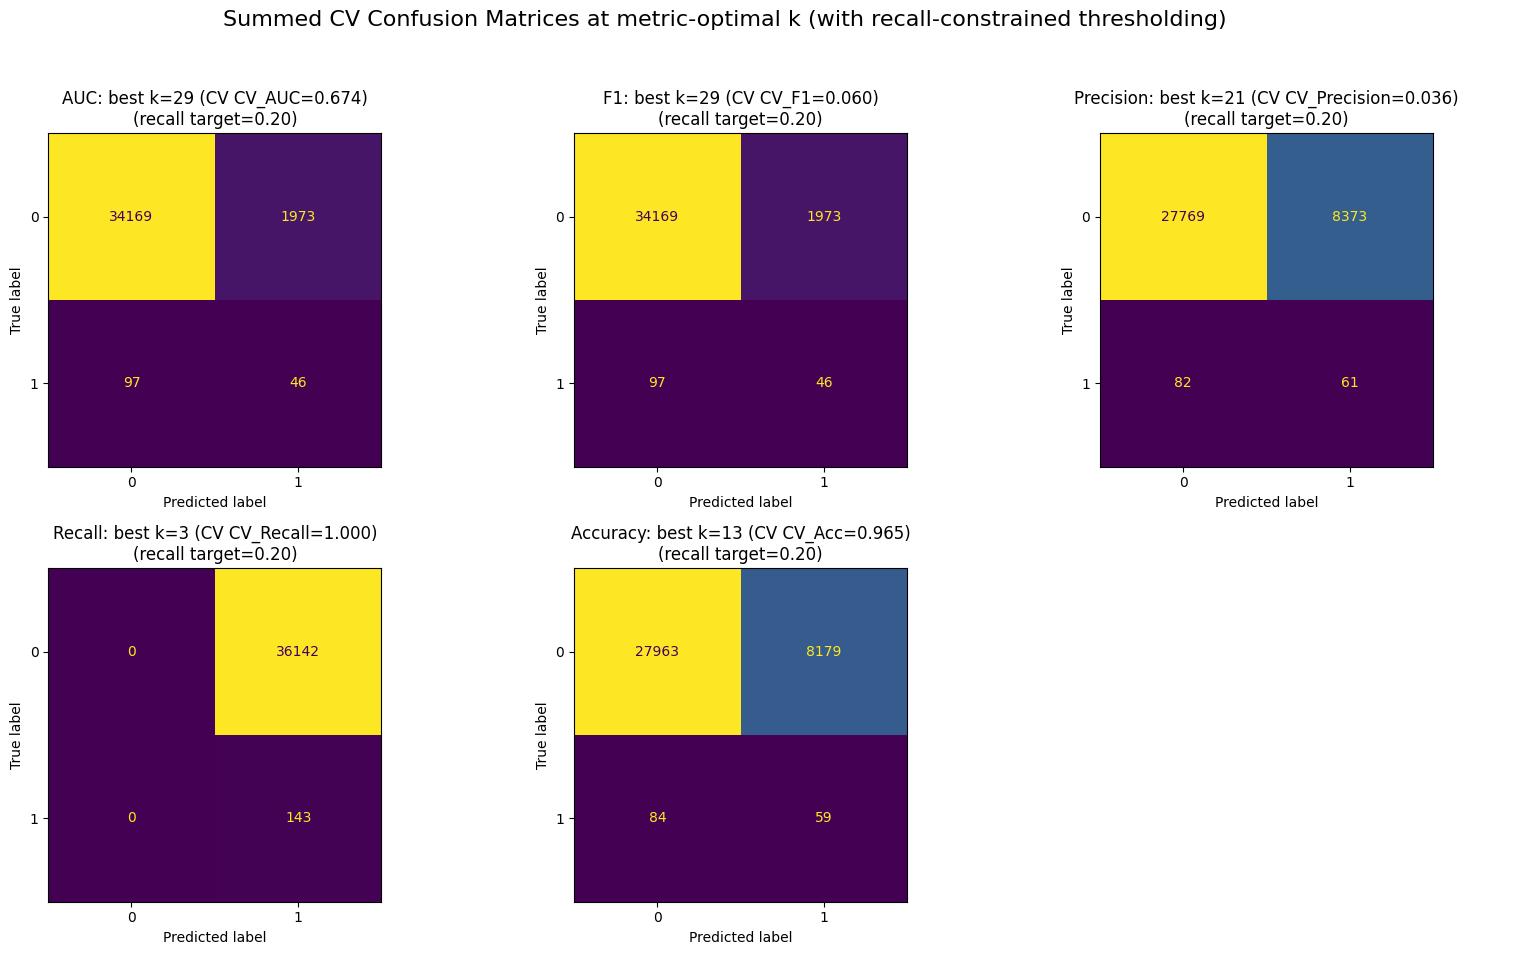

In [81]:
# ----------------------------
# threshold helper (yours)
# ----------------------------
def threshold_for_target_recall(y_true, probs, target=0.20):
    """
    Highest threshold such that recall >= target.
    """
    ts = np.unique(probs)
    for t in ts[::-1]:
        y_hat = (probs >= t).astype(int)
        if recall_score(y_true, y_hat, zero_division=0) >= target:
            return t
    return 1.0  # predict no bankruptcies

# ----------------------------
# pick best k for each metric (ties -> larger k)
# ----------------------------
metric_info = [
    ("AUC",       "CV_AUC"),
    ("F1",        "CV_F1"),
    ("Precision", "CV_Precision"),
    ("Recall",    "CV_Recall"),
    ("Accuracy",  "CV_Acc"),
]

df = results_df.sort_values("k").copy()

def best_k_for_metric(df, mcol):
    tmp = df[["k", mcol]].dropna()
    m_best = tmp[mcol].max()
    k_best = int(tmp.loc[tmp[mcol] == m_best, "k"].max())  # larger k if tie
    return k_best, float(m_best)



# ----------------------------
# summed CV confusion matrix with recall-constrained thresholding
# ----------------------------
def cv_confusion_matrix_for_k_with_recall_constraint(X, y, skf, k, target_recall=0.20):
    cm_sum = np.zeros((2, 2), dtype=int)

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_tr, y_tr)

        val_prob = model.predict_proba(X_val)[:, 1]

        # threshold chosen on THIS validation fold to hit recall target
        thr = threshold_for_target_recall(y_val, val_prob, target=target_recall)
        y_pred = (val_prob >= thr).astype(int)

        cm_sum += confusion_matrix(y_val, y_pred, labels=[0, 1])

    return cm_sum

# ----------------------------
# plot all 5 confusion matrices as subplots
# ----------------------------
target_recall = 0.20  # set your recall target here

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, (name, mcol) in enumerate(metric_info):
    ax = axes[i]

    k_best, m_best = best_k_for_metric(df, mcol)
    cm = cv_confusion_matrix_for_k_with_recall_constraint(
        X, y, skf, k_best, target_recall=target_recall
    )

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax, values_format="d", colorbar=False)
    ax.set_title(f"{name}: best k={k_best} (CV {mcol}={m_best:.3f})\n(recall target={target_recall:.2f})")

# hide unused 6th subplot
axes[-1].axis("off")

fig.suptitle("Summed CV Confusion Matrices at metric-optimal k (with recall-constrained thresholding)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## plot error curves against k with recall constraint

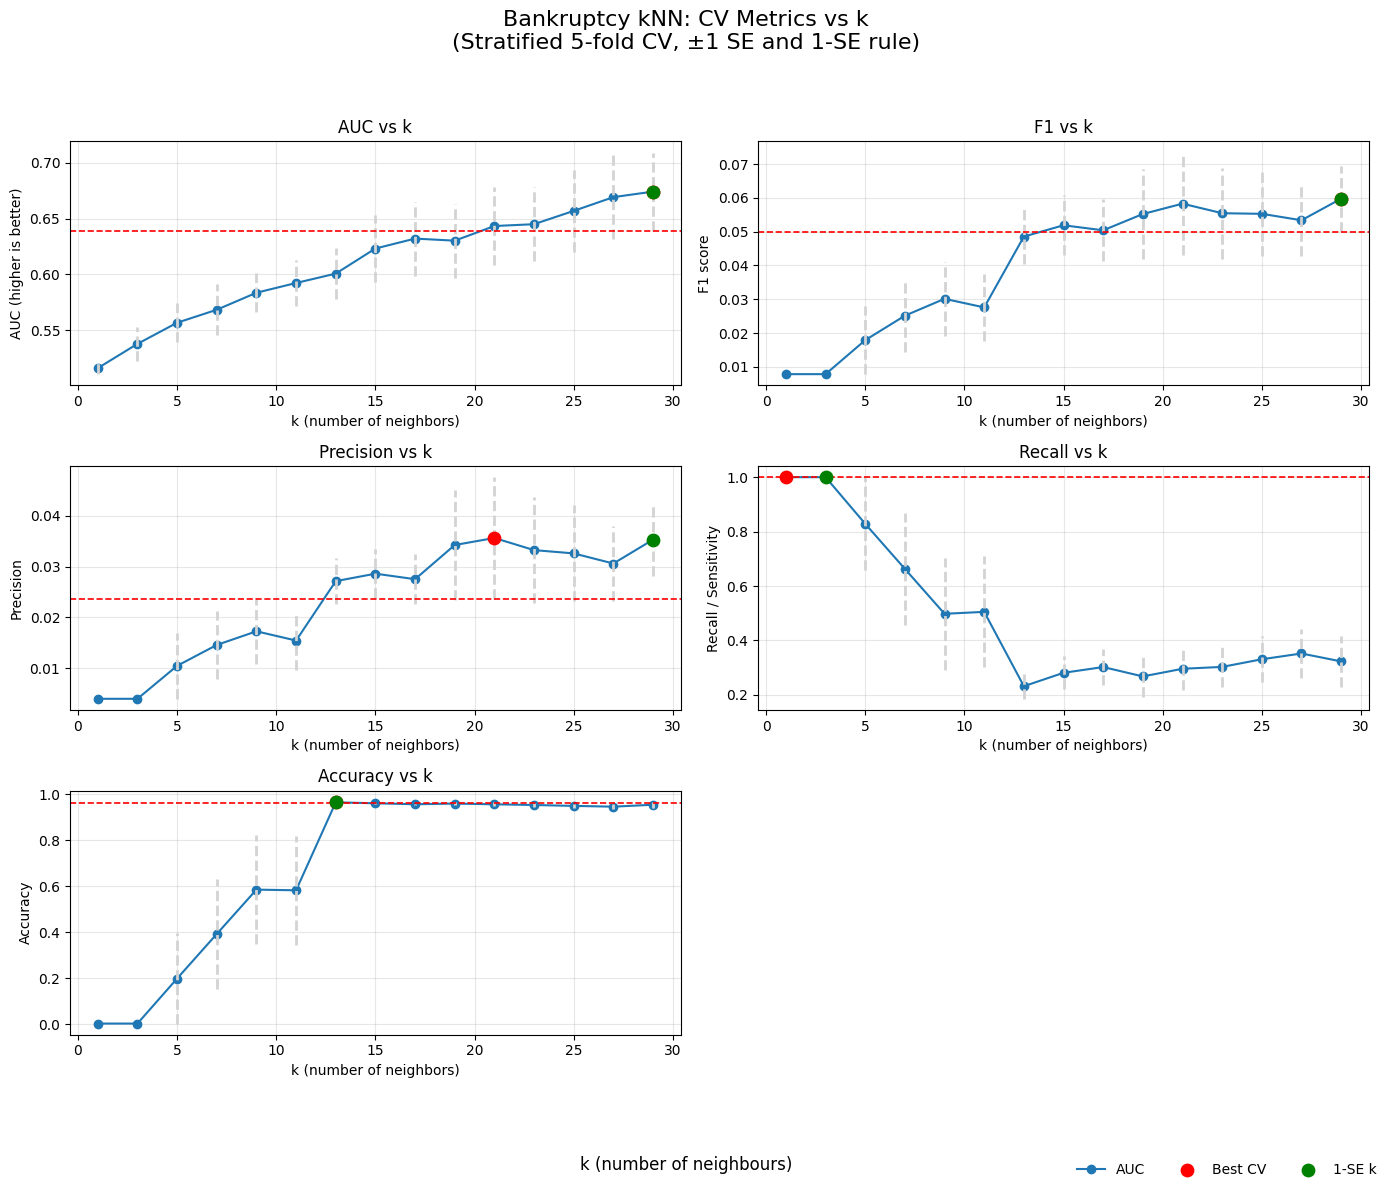

In [82]:
# ------------------------------------------------------------
# 5 subplots: AUC, F1, Precision, Recall, Accuracy, vs k
# with ±1 SE bars and 1-SE rule in each subplot
# ------------------------------------------------------------

metric_info = [
    ("AUC", "CV_AUC", "CV_SE_AUC", "AUC (higher is better)"),
    ("F1", "CV_F1", "CV_SE_F1", "F1 score"),
    ("Precision", "CV_Precision", "CV_SE_Precision", "Precision"),
    ("Recall", "CV_Recall", "CV_SE_Recall", "Recall / Sensitivity"),
    ("Accuracy", "CV_Acc", "CV_SE_Acc", "Accuracy"),
]

df = results_df.sort_values("k").copy()

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for ax, (name, mcol, secol, ylabel) in zip(axes, metric_info):

    # ----------------------------
    # best k
    # ----------------------------
    idx_best = df[mcol].idxmax()
    k_best   = int(df.loc[idx_best, "k"])
    m_best   = float(df.loc[idx_best, mcol])
    se_best  = float(df.loc[idx_best, secol])

    # 1-SE rule: accept metric >= best - SE(best)
    threshold = m_best - se_best
    candidates = df.loc[df[mcol].notna() & (df[mcol] >= threshold), "k"]
    k_1se = int(candidates.max()) if len(candidates) else k_best
    m_1se = float(df.loc[df["k"] == k_1se, mcol].iloc[0])

    # ----------------------------
    # plot main curve
    # ----------------------------
    ax.plot(df["k"], df[mcol], marker="o", label=name)

    # ±1 SE bars
    for _, row in df.iterrows():
        if np.isnan(row[mcol]) or np.isnan(row[secol]):
            continue
        ax.vlines(
            x=row["k"],
            ymin=row[mcol] - row[secol],
            ymax=row[mcol] + row[secol],
            colors="lightgray",
            linewidth=2,
            linestyles="dashed"
        )

    # best k and 1-SE k markers
    ax.scatter(k_best, m_best, color="red", s=80, zorder=5, label="Best CV")
    ax.scatter(k_1se, m_1se, color="green", s=80, zorder=5, label="1-SE k")

    # 1-SE threshold line
    ax.axhline(
        y=threshold,
        color="red",
        linestyle="--",
        linewidth=1.2
    )

    
    ax.set_xlabel("k (number of neighbors)")
    ax.tick_params(axis="x", which="both", labelbottom=True)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{name} vs k")
    ax.grid(True, which="both", alpha=0.3)

# remove unused subplot in bottom-right
fig.delaxes(axes[-1])

# global labels
fig.supxlabel("k (number of neighbours)")
fig.suptitle(
    f"Bankruptcy kNN: CV Metrics vs k\n(Stratified {n_splits}-fold CV, ±1 SE and 1-SE rule)",
    fontsize=16
)

# legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


## 2. without recall constraint

In [83]:
'''import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
)

# ----------------------------
# KNN CV over k (NO recall constraint / NO threshold tuning)
# Uses default KNN decision rule: predict() = threshold 0.5 on prob(class=1)
# ----------------------------

n_splits = 5
k_values = np.arange(1, 31, 2)

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []           # summary metrics for each k
all_fold_details = []  # per-fold metrics for SE computation

for k in k_values:
    print("\n" + "=" * 50)
    print(f"k = {k}")
    print("=" * 50)

    fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}

    # Stratified K-Fold CV
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        # Scale within fold (fit on train only)
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        # Fit KNN
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        knn_cv.fit(X_tr, y_tr)

        # Default predictions (threshold=0.5 internally)
        val_pred = knn_cv.predict(X_val)
        val_prob = knn_cv.predict_proba(X_val)[:, 1]

        # Metrics
        fold_acc = accuracy_score(y_val, val_pred)
        fold_rec = recall_score(y_val, val_pred, zero_division=0)
        fold_pre = precision_score(y_val, val_pred, zero_division=0)
        fold_f1  = f1_score(y_val, val_pred, zero_division=0)

        # AUC can fail if y_val has only one class
        try:
            fold_auc = roc_auc_score(y_val, val_prob)
        except ValueError:
            fold_auc = np.nan

        # Store fold metrics
        fold_metrics["acc"].append(fold_acc)
        fold_metrics["recall"].append(fold_rec)
        fold_metrics["precision"].append(fold_pre)
        fold_metrics["f1"].append(fold_f1)
        fold_metrics["auc"].append(fold_auc)

        print(
            f"Validation metrics (fold {fold}, k={k}): "
            f"Acc={fold_acc:.3f} | Recall={fold_rec:.3f} | Precision={fold_pre:.3f} | "
            f"F1={fold_f1:.3f} | AUC={fold_auc:.3f}"
        )

        all_fold_details.append({
            "k": k,
            "fold": fold,
            "train_indices": train_idx,
            "validation_indices": val_idx,
            "val_acc": fold_acc,
            "val_recall": fold_rec,
            "val_precision": fold_pre,
            "val_f1": fold_f1,
            "val_auc": fold_auc
        })

    # Mean CV metrics for this k
    cv_acc_mean = float(np.nanmean(fold_metrics["acc"]))
    cv_rec_mean = float(np.nanmean(fold_metrics["recall"]))
    cv_pre_mean = float(np.nanmean(fold_metrics["precision"]))
    cv_f1_mean  = float(np.nanmean(fold_metrics["f1"]))
    cv_auc_mean = float(np.nanmean(fold_metrics["auc"]))

    print(
        f"\nMean CV metrics (k={k}): "
        f"Acc={cv_acc_mean:.3f} | Recall={cv_rec_mean:.3f} | Precision={cv_pre_mean:.3f} | "
        f"F1={cv_f1_mean:.3f} | AUC={cv_auc_mean:.3f}"
    )

    results.append([k, cv_acc_mean, cv_rec_mean, cv_pre_mean, cv_f1_mean, cv_auc_mean])

# ----------------------------
# Results dataframe
# ----------------------------
results_df = pd.DataFrame(results, columns=[
    "k", "CV_Acc", "CV_Recall", "CV_Precision", "CV_F1", "CV_AUC"
])

# ----------------------------
# Standard errors across folds for each k
# ----------------------------
def se(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if len(x) <= 1:
        return np.nan
    return np.std(x, ddof=1) / np.sqrt(len(x))

se_rows = []
for k in k_values:
    rows = [d for d in all_fold_details if d["k"] == k]
    se_rows.append([
        k,
        se([r["val_acc"] for r in rows]),
        se([r["val_recall"] for r in rows]),
        se([r["val_precision"] for r in rows]),
        se([r["val_f1"] for r in rows]),
        se([r["val_auc"] for r in rows]),
    ])

se_df = pd.DataFrame(se_rows, columns=[
    "k", "CV_SE_Acc", "CV_SE_Recall", "CV_SE_Precision", "CV_SE_F1", "CV_SE_AUC"
])

results_df = results_df.merge(se_df, on="k", how="left")

results_df
'''

'import numpy as np\nimport pandas as pd\n\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import (\n    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score\n)\n\n# ----------------------------\n# KNN CV over k (NO recall constraint / NO threshold tuning)\n# Uses default KNN decision rule: predict() = threshold 0.5 on prob(class=1)\n# ----------------------------\n\nn_splits = 5\nk_values = np.arange(1, 31, 2)\n\nskf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)\n\nresults = []           # summary metrics for each k\nall_fold_details = []  # per-fold metrics for SE computation\n\nfor k in k_values:\n    print("\n" + "=" * 50)\n    print(f"k = {k}")\n    print("=" * 50)\n\n    fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}\n\n    # Stratified K-Fold CV\n    for fold, (train_idx, val_idx) 

### confusion matrices for k maximising each measure (no constraint)

In [84]:
'''import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# ------------------------------------------------------------
# Confusion matrices for the k that maximises each CV measure
# (AUC, F1, Precision, Recall, Accuracy) as subplots
# ------------------------------------------------------------

metric_info = [
    ("AUC",       "CV_AUC"),
    ("F1",        "CV_F1"),
    ("Precision", "CV_Precision"),
    ("Recall",    "CV_Recall"),
    ("Accuracy",  "CV_Acc"),
]

df = results_df.sort_values("k").copy()

def best_k_for_metric(df, mcol):
    """
    Returns the largest k among ties for the maximum metric value.
    (So if multiple k achieve the same max, you get the greater k.)
    """
    tmp = df[["k", mcol]].dropna()
    m_best = tmp[mcol].max()
    k_best = int(tmp.loc[tmp[mcol] == m_best, "k"].max())
    return k_best, float(m_best)

def cv_confusion_matrix_for_k(X, y, skf, k):
    """
    Sum confusion matrices across folds for a given k.
    Uses StandardScaler fit on training fold only (no leakage).
    Uses model.predict() (0.5 threshold) to match your current metrics code.
    """
    cm_sum = np.zeros((2, 2), dtype=int)

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)
        cm_sum += confusion_matrix(y_val, y_pred, labels=[0, 1])

    return cm_sum


# pick best k for each metric, compute CM, and plot
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, (name, mcol) in enumerate(metric_info):
    ax = axes[i]

    k_best, m_best = best_k_for_metric(df, mcol)
    cm = cv_confusion_matrix_for_k(X, y, skf, k_best)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax, values_format="d", colorbar=False)
    ax.set_title(f"{name}: best k = {k_best} (CV {mcol} = {m_best:.3f})")

# hide the unused 6th subplot
axes[-1].axis("off")

fig.suptitle("Summed CV Confusion Matrices at k that maximises each metric", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
'''

'import numpy as np\nimport matplotlib.pyplot as plt\n\nfrom sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.neighbors import KNeighborsClassifier\n\n\n# ------------------------------------------------------------\n# Confusion matrices for the k that maximises each CV measure\n# (AUC, F1, Precision, Recall, Accuracy) as subplots\n# ------------------------------------------------------------\n\nmetric_info = [\n    ("AUC",       "CV_AUC"),\n    ("F1",        "CV_F1"),\n    ("Precision", "CV_Precision"),\n    ("Recall",    "CV_Recall"),\n    ("Accuracy",  "CV_Acc"),\n]\n\ndf = results_df.sort_values("k").copy()\n\ndef best_k_for_metric(df, mcol):\n    """\n    Returns the largest k among ties for the maximum metric value.\n    (So if multiple k achieve the same max, you get the greater k.)\n    """\n    tmp = df[["k", mcol]].dropna()\n    m_best = tmp[mcol].max()\n    k_best = int(tmp.loc[tmp[mcol] == m_bes

## error curves against k

In [85]:
'''# ------------------------------------------------------------
# 5 subplots: AUC, F1, Precision, Recall, Accuracy, vs k
# with ±1 SE bars and 1-SE rule in each subplot
# ------------------------------------------------------------

metric_info = [
    ("AUC", "CV_AUC", "CV_SE_AUC", "AUC (higher is better)"),
    ("F1", "CV_F1", "CV_SE_F1", "F1 score"),
    ("Precision", "CV_Precision", "CV_SE_Precision", "Precision"),
    ("Recall", "CV_Recall", "CV_SE_Recall", "Recall / Sensitivity"),
    ("Accuracy", "CV_Acc", "CV_SE_Acc", "Accuracy"),
]

df = results_df.sort_values("k").copy()

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for ax, (name, mcol, secol, ylabel) in zip(axes, metric_info):

    # ----------------------------
    # best k
    # ----------------------------
    idx_best = df[mcol].idxmax()
    k_best   = int(df.loc[idx_best, "k"])
    m_best   = float(df.loc[idx_best, mcol])
    se_best  = float(df.loc[idx_best, secol])

    # 1-SE rule: accept metric >= best - SE(best)
    threshold = m_best - se_best
    candidates = df.loc[df[mcol].notna() & (df[mcol] >= threshold), "k"]
    k_1se = int(candidates.max()) if len(candidates) else k_best
    m_1se = float(df.loc[df["k"] == k_1se, mcol].iloc[0])

    # ----------------------------
    # plot main curve
    # ----------------------------
    ax.plot(df["k"], df[mcol], marker="o", label=name)

    # ±1 SE bars
    for _, row in df.iterrows():
        if np.isnan(row[mcol]) or np.isnan(row[secol]):
            continue
        ax.vlines(
            x=row["k"],
            ymin=row[mcol] - row[secol],
            ymax=row[mcol] + row[secol],
            colors="lightgray",
            linewidth=2,
            linestyles="dashed"
        )

    # best k and 1-SE k markers
    ax.scatter(k_best, m_best, color="red", s=80, zorder=5, label="Best CV")
    ax.scatter(k_1se, m_1se, color="green", s=80, zorder=5, label="1-SE k")

    # 1-SE threshold line
    ax.axhline(
        y=threshold,
        color="red",
        linestyle="--",
        linewidth=1.2
    )

    
    ax.set_xlabel("k (number of neighbors)")
    ax.tick_params(axis="x", which="both", labelbottom=True)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{name} vs k")
    ax.grid(True, which="both", alpha=0.3)

# remove unused subplot in bottom-right
fig.delaxes(axes[-1])

# global labels
fig.supxlabel("k (number of neighbours)")
fig.suptitle(
    f"Bankruptcy kNN: CV Metrics vs k\n(Stratified {n_splits}-fold CV, ±1 SE and 1-SE rule)",
    fontsize=16
)

# legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()'''


'# ------------------------------------------------------------\n# 5 subplots: AUC, F1, Precision, Recall, Accuracy, vs k\n# with ±1 SE bars and 1-SE rule in each subplot\n# ------------------------------------------------------------\n\nmetric_info = [\n    ("AUC", "CV_AUC", "CV_SE_AUC", "AUC (higher is better)"),\n    ("F1", "CV_F1", "CV_SE_F1", "F1 score"),\n    ("Precision", "CV_Precision", "CV_SE_Precision", "Precision"),\n    ("Recall", "CV_Recall", "CV_SE_Recall", "Recall / Sensitivity"),\n    ("Accuracy", "CV_Acc", "CV_SE_Acc", "Accuracy"),\n]\n\ndf = results_df.sort_values("k").copy()\n\nfig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)\naxes = axes.flatten()\n\nfor ax, (name, mcol, secol, ylabel) in zip(axes, metric_info):\n\n    # ----------------------------\n    # best k\n    # ----------------------------\n    idx_best = df[mcol].idxmax()\n    k_best   = int(df.loc[idx_best, "k"])\n    m_best   = float(df.loc[idx_best, mcol])\n    se_best  = float(df.loc[idx_b

# evaluate ratios using leave-one-out (LOO)

In [86]:
# fix k
idx_best = results_df["CV_F1"].idxmax()
# k_best = int(results_df.loc[idx_best, "k"])
k_best = 21


In [87]:
'''# create helper function to evaluate KNN metrics

def cv_knn_fixed_k(X, y, k, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    metrics = {"auc": [], "recall": [], "f1": []}

    for tr_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, y_tr)

        pred = knn.predict(X_val)
        prob = knn.predict_proba(X_val)[:, 1]

        metrics["recall"].append(recall_score(y_val, pred, zero_division=0))
        metrics["f1"].append(f1_score(y_val, pred, zero_division=0))
        try:
            metrics["auc"].append(roc_auc_score(y_val, prob))
        except ValueError:
            metrics["auc"].append(np.nan)

    return {m: np.nanmean(v) for m, v in metrics.items()}'''


'# create helper function to evaluate KNN metrics\n\ndef cv_knn_fixed_k(X, y, k, n_splits=5):\n    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)\n\n    metrics = {"auc": [], "recall": [], "f1": []}\n\n    for tr_idx, val_idx in skf.split(X, y):\n        X_tr, X_val = X[tr_idx], X[val_idx]\n        y_tr, y_val = y[tr_idx], y[val_idx]\n\n        scaler = StandardScaler()\n        X_tr = scaler.fit_transform(X_tr)\n        X_val = scaler.transform(X_val)\n\n        knn = KNeighborsClassifier(n_neighbors=k)\n        knn.fit(X_tr, y_tr)\n\n        pred = knn.predict(X_val)\n        prob = knn.predict_proba(X_val)[:, 1]\n\n        metrics["recall"].append(recall_score(y_val, pred, zero_division=0))\n        metrics["f1"].append(f1_score(y_val, pred, zero_division=0))\n        try:\n            metrics["auc"].append(roc_auc_score(y_val, prob))\n        except ValueError:\n            metrics["auc"].append(np.nan)\n\n    return {m: np.nanmean(v) for m, v in metrics.it

In [88]:
# create helper function to evaluate KNN metrics with threshold tuning for recall
def cv_knn_fixed_k(X, y, k, n_splits=5, target_recall=0.20):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    metrics = {"auc": [], "recall": [], "f1": []}

    for tr_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, y_tr)

        prob = knn.predict_proba(X_val)[:, 1]

        # 🔑 threshold tuning (same as before)
        threshold = threshold_for_target_recall(
            y_val, prob, target=target_recall
        )
        pred = (prob >= threshold).astype(int)

        metrics["recall"].append(
            recall_score(y_val, pred, zero_division=0)
        )
        metrics["f1"].append(
            f1_score(y_val, pred, zero_division=0)
        )

        try:
            metrics["auc"].append(roc_auc_score(y_val, prob))
        except ValueError:
            metrics["auc"].append(np.nan)

    return {m: np.nanmean(v) for m, v in metrics.items()}


In [89]:
baseline_metrics = cv_knn_fixed_k(X, y, k=k_best)
baseline_metrics


{'auc': np.float64(0.6432972357245444),
 'recall': np.float64(0.4246305418719212),
 'f1': np.float64(0.054252360521721624)}

In [90]:
ablation = []

for feat in feature_cols:
    X_minus = X_df.drop(columns=[feat]).values
    metrics_minus = cv_knn_fixed_k(X_minus, y, k=k_best)

    ablation.append({
        "feature": feat,
        "Delta_AUC": baseline_metrics["auc"] - metrics_minus["auc"],
        "Delta_Recall": baseline_metrics["recall"] - metrics_minus["recall"],
        "Delta_F1": baseline_metrics["f1"] - metrics_minus["f1"],
    })

ablation_df = pd.DataFrame(ablation).sort_values("Delta_AUC", ascending=False)
ablation_df


,feature,Delta_AUC,Delta_Recall,Delta_F1
16,roe,0.031240,-0.014532,0.020237
20,days_inventory_outstanding,0.014712,0.014039,0.000926
3,debt_to_equity,0.013048,0.122660,0.007392
4,liabilities_to_assets,0.011117,0.158374,-0.008423
7,debt_to_assets,0.007693,0.000000,-0.001356
11,dividend_yield,0.003620,-0.064286,0.012761
14,net_profit_margin,0.000241,0.000000,-0.000148
13,gross_margin,0.000178,0.000000,-0.000353
21,free_cash_flow_to_sales,0.000126,0.000000,-0.000389
8,book_value_per_share,-0.000086,0.000000,-0.000120


# test KNN

## compute threshold from test data

In [ ]:
# choose k to maximise AUC
k_final = int(results_df.loc[results_df["CV_AUC"].idxmax(), "k"])  # example: choose by F1
fixed_threshold = float(results_df.loc[results_df["k"] == k_final, "Thr_Mean"].iloc[0])
print(k_final, fixed_threshold)

# "CV_Acc", "CV_Recall", "CV_Precision", "CV_F1", "CV_AUC"

29 0.03908045977011494


In [92]:
# ----------------------------
# 0) SETTINGS (EDIT THESE)
# ----------------------------
train_path = "/Users/songyi/Documents/st310/st310_groupproject/ST310-Predicting-Company-Bankruptcy/notebooks/train_set.csv"
test_path  = "/Users/songyi/Documents/st310/st310_groupproject/ST310-Predicting-Company-Bankruptcy/notebooks/test_set.csv"

target_col = "default_next_1y"   # <-- change to your target column name
feature_cols = feature_cols


# ----------------------------
# 1) LOAD CSVs
# ----------------------------
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# ----------------------------
# 2) KEEP ONLY REQUIRED COLUMNS + DROP NaNs CONSISTENTLY
# ----------------------------
needed_cols = feature_cols + [target_col]

# keep only needed columns (avoids huge memory use)
train_df = train_df[needed_cols].copy()
test_df  = test_df[needed_cols].copy()

# drop rows with missing X or missing y
train_df = train_df.dropna(subset=needed_cols).reset_index(drop=True)
test_df  = test_df.dropna(subset=needed_cols).reset_index(drop=True)

# ----------------------------
# 3) BUILD X/y ARRAYS
# ----------------------------
X_train = train_df[feature_cols].to_numpy()
y_train = train_df[target_col].to_numpy().ravel()

X_test  = test_df[feature_cols].to_numpy()
y_test  = test_df[target_col].to_numpy().ravel()

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train default rate:", y_train.mean(), "Test default rate:", y_test.mean())

# ----------------------------
# 4) SCALE (FIT ON TRAIN ONLY)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# 5) TRAIN FINAL MODEL (k=21) ON FULL TRAIN
# ----------------------------
knn = KNeighborsClassifier(n_neighbors=k_final)
knn.fit(X_train_scaled, y_train)

# ----------------------------
# 6) PREDICT ON TEST
# ----------------------------
y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]
fixed_threshold = fixed_threshold  # from previous CV step
y_test_pred = (y_test_prob >= fixed_threshold).astype(int)

# ----------------------------
# 7) EVALUATE ON TEST (NO CV HERE)
# ----------------------------
acc  = accuracy_score(y_test, y_test_pred)
rec  = recall_score(y_test, y_test_pred, zero_division=0)
pre  = precision_score(y_test, y_test_pred, zero_division=0)
f1   = f1_score(y_test, y_test_pred, zero_division=0)

try:
    auc = roc_auc_score(y_test, y_test_prob)
except ValueError:
    auc = np.nan

cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

print(f"\nTEST RESULTS (k={k_final})")
print("-" * 40)
print(f"Accuracy : {acc:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"Precision: {pre:.4f}")
print(f"F1       : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

print("\nConfusion Matrix (labels=[0,1])")
print("TN FP")
print("FN TP")
print(cm)


Train shape: (145139, 24) Test shape: (36285, 24)
Train default rate: 0.003927269720750453 Test default rate: 0.003941022461072068

TEST RESULTS (k=29)
----------------------------------------
Accuracy : 0.9842
Recall   : 0.2937
Precision: 0.0816
F1       : 0.1277
AUC      : 0.7149

Confusion Matrix (labels=[0,1])
TN FP
FN TP
[[35669   473]
 [  101    42]]


# Industry breakdown

In [140]:
clean_df_1980['naicsh'].describe()

count     34788.000000
mean     372683.829453
std      163957.091187
min          21.000000
25%      325312.000000
50%      334510.000000
75%      511210.000000
max      999990.000000
Name: naicsh, dtype: float64

In [153]:
# ============================================================
# 0) Load train/test
# ============================================================

train_df = clean_df_1980.copy()
test_df  = pd.read_csv(test_path)

TARGET_COL = "default_next_1y"

In [154]:
# ============================================================
# 1) Industry map (2-digit NAICS codes)
# ============================================================
industry_map = {
    "G1_manufacturing": [11, 21, 22, 23] + list(range(31, 34)) + [48, 49],
    "G2_construction_retail": [42, 44, 45],
    "G3_finance": [52, 53],
    "G4_services": [51, 54, 55, 56, 81, 92],
    "G5_info_health": [61, 62],
    "G6_arts_accom": [71, 72],
}

# ============================================================
# 2) Robust conversion: naicsh -> naics2
#    Handles mixed formats: 21, 334510.0, 999990, etc.
# ============================================================
def to_naics2(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip()
    s = s.replace(".0", "") if s.endswith(".0") else s
    s = "".join(ch for ch in s if ch.isdigit())  # digits only
    if len(s) < 2:
        return np.nan

    naics2 = int(s[:2])

    # Keep standard NAICS 2-digit range; treat 99 as missing/placeholder
    if naics2 < 11 or naics2 > 99 or naics2 == 99:
        return np.nan

    return naics2

train_df["naics2"] = train_df["naicsh"].apply(to_naics2)
test_df["naics2"]  = test_df["naicsh"].apply(to_naics2)

# ============================================================
# 3) Assign industry groups
#    Option A (recommended): keep everything by adding G0_other
# ============================================================
def assign_group(naics2):
    if pd.isna(naics2):
        return "G0_other"   # or np.nan if you prefer dropping
    naics2 = int(naics2)
    for g, codes in industry_map.items():
        if naics2 in codes:
            return g
    return "G0_other"

train_df["industry_group"] = train_df["naics2"].apply(assign_group)
test_df["industry_group"]  = test_df["naics2"].apply(assign_group)

# Quick sanity checks
print(train_df["industry_group"].value_counts(dropna=False).head(20))
print("naics2 non-null share (train):", train_df["naics2"].notna().mean())
print(train_df[["naicsh", "naics2", "industry_group"]].head(10))


industry_group
G1_manufacturing          21603
G4_services                6689
G2_construction_retail     3300
G0_other                   1544
G6_arts_accom              1169
G3_finance                 1013
G5_info_health              967
Name: count, dtype: int64
naics2 non-null share (train): 0.9574479812594736
     naicsh  naics2          industry_group
0  213114.0    21.0        G1_manufacturing
1  334516.0    33.0        G1_manufacturing
2  421430.0    42.0  G2_construction_retail
3  517212.0    51.0             G4_services
4  423830.0    42.0  G2_construction_retail
5  336999.0    33.0        G1_manufacturing
6    3351.0    33.0        G1_manufacturing
7  486210.0    48.0        G1_manufacturing
8  336399.0    33.0        G1_manufacturing
9  326121.0    32.0        G1_manufacturing


In [168]:
train_df = ensure_naics2(train_df)
test_df  = ensure_naics2(test_df)

train_df["industry_group"] = train_df["naics2"].apply(assign_group)
test_df["industry_group"]  = test_df["naics2"].apply(assign_group)
# ============================================================
# 2) Feature columns
# ============================================================
liquidity_ratios = ["current_ratio", "quick_ratio"]
leverage_ratios = ["debt_to_equity", "liabilities_to_assets", "interest_coverage", "total_debt", "debt_to_assets"]
marketvalue_ratios = ["book_value_per_share", "earnings_per_share", "dividend_payout_ratio", "dividend_yield", "retention_ratio"]
profitability_ratios = ["gross_margin", "net_profit_margin", "roa", "roe"]
efficiency_ratios = ["asset_turnover"]

feature_cols = (
    liquidity_ratios
    + leverage_ratios
    + marketvalue_ratios
    + profitability_ratios
    + efficiency_ratios
)

# sanity check: ensure columns exist
missing_train = [c for c in feature_cols + [TARGET_COL] if c not in train_df.columns]
missing_test  = [c for c in feature_cols if c not in test_df.columns]
if missing_train:
    raise ValueError(f"Missing columns in train.csv: {missing_train}")
if missing_test:
    raise ValueError(f"Missing feature columns in test.csv: {missing_test}")

# ============================================================
# 3) Utilities: threshold for target recall + SE
# ============================================================
def threshold_for_target_recall(y_true, probs, target=0.20):
    """
    Smallest threshold such that recall >= target (on the provided y_true/probs).
    If impossible (e.g., no positives), returns 1.0.
    """
    y_true = np.asarray(y_true).astype(int)
    probs = np.asarray(probs).astype(float)

    pos = (y_true == 1).sum()
    if pos == 0:
        return 1.0

    # Sort thresholds descending; moving threshold down increases predicted positives, thus recall weakly increases
    thresh_grid = np.unique(probs)[::-1]
    best = 1.0
    for thr in thresh_grid:
        y_hat = (probs >= thr).astype(int)
        rec = recall_score(y_true, y_hat, zero_division=0)
        if rec >= target:
            best = float(thr)
            break

    # If even thr=min(probs) doesn't hit target (rare), return min threshold to maximize recall
    return best

def se(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if len(x) <= 1:
        return np.nan
    return np.std(x, ddof=1) / np.sqrt(len(x))

# ============================================================
# 4) Nested CV within each industry group (TRAIN ONLY)
# ============================================================
def nested_cv_knn_fixed_recall_by_group(
    train_df,
    feature_cols,
    target_col,
    group_col="industry_group",
    k_values=None,
    target_recall=0.20,
    n_splits_outer=5,
    n_splits_inner=5,
    random_state=42,
    min_pos_total=20,  # skip groups with too few defaults
):
    """
    For each industry group:
      - Outer CV estimates performance
      - Inner CV calibrates threshold to meet target recall
    Returns:
      - group_results: dict[group] -> results_df (per-k metrics + Thr_Mean/Thr_SD + SEs)
      - outer_details_df: per-outer-fold records (optional debugging/plots)
    """
    if k_values is None:
        k_values = np.arange(1, 31, 2)

    group_results = {}
    all_outer_details = []

    df0 = train_df.dropna(subset=[group_col]).copy()

    for g, gdf in df0.groupby(group_col):
        # drop missing features/target
        gdf = gdf.dropna(subset=feature_cols + [target_col]).copy()

        Xg = gdf[feature_cols].to_numpy()
        yg = gdf[target_col].to_numpy().astype(int).ravel()

        n = len(yg)
        n_pos = int((yg == 1).sum())
        n_neg = int((yg == 0).sum())

        print("\n" + "#" * 70)
        print(f"TRAIN Nested CV | Group={g} | n={n} | pos={n_pos} | neg={n_neg}")
        print("#" * 70)

        if n_pos < min_pos_total:
            print(f"Skipping {g}: too few positive cases (pos={n_pos} < {min_pos_total}).")
            continue

        outer_cv = StratifiedKFold(n_splits=n_splits_outer, shuffle=True, random_state=random_state)

        results = []
        se_rows = []

        for k in k_values:
            outer_fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}
            outer_fold_thresholds = []

            for outer_fold, (tr_outer_idx, val_outer_idx) in enumerate(outer_cv.split(Xg, yg), start=1):
                X_tr_outer, X_val_outer = Xg[tr_outer_idx], Xg[val_outer_idx]
                y_tr_outer, y_val_outer = yg[tr_outer_idx], yg[val_outer_idx]

                # ----- INNER CV: threshold calibration on outer training only -----
                inner_cv = StratifiedKFold(n_splits=n_splits_inner, shuffle=True, random_state=random_state)

                inner_thresholds = []
                for tr_inner_idx, cal_inner_idx in inner_cv.split(X_tr_outer, y_tr_outer):
                    X_tr_inner, X_cal = X_tr_outer[tr_inner_idx], X_tr_outer[cal_inner_idx]
                    y_tr_inner, y_cal = y_tr_outer[tr_inner_idx], y_tr_outer[cal_inner_idx]

                    scaler = StandardScaler()
                    X_tr_inner_s = scaler.fit_transform(X_tr_inner)
                    X_cal_s = scaler.transform(X_cal)

                    model = KNeighborsClassifier(n_neighbors=k)
                    model.fit(X_tr_inner_s, y_tr_inner)

                    p_cal = model.predict_proba(X_cal_s)[:, 1]
                    thr = threshold_for_target_recall(y_cal, p_cal, target=target_recall)
                    inner_thresholds.append(thr)

                thr_outer = float(np.mean(inner_thresholds))
                outer_fold_thresholds.append(thr_outer)

                # ----- OUTER evaluation (unbiased) -----
                scaler = StandardScaler()
                X_tr_outer_s = scaler.fit_transform(X_tr_outer)
                X_val_outer_s = scaler.transform(X_val_outer)

                model = KNeighborsClassifier(n_neighbors=k)
                model.fit(X_tr_outer_s, y_tr_outer)

                p_val = model.predict_proba(X_val_outer_s)[:, 1]
                y_hat = (p_val >= thr_outer).astype(int)

                fold_acc = accuracy_score(y_val_outer, y_hat)
                fold_rec = recall_score(y_val_outer, y_hat, zero_division=0)
                fold_pre = precision_score(y_val_outer, y_hat, zero_division=0)
                fold_f1  = f1_score(y_val_outer, y_hat, zero_division=0)

                try:
                    fold_auc = roc_auc_score(y_val_outer, p_val)
                except ValueError:
                    fold_auc = np.nan

                outer_fold_metrics["acc"].append(fold_acc)
                outer_fold_metrics["recall"].append(fold_rec)
                outer_fold_metrics["precision"].append(fold_pre)
                outer_fold_metrics["f1"].append(fold_f1)
                outer_fold_metrics["auc"].append(fold_auc)

                all_outer_details.append({
                    "group": g, "k": k, "outer_fold": outer_fold,
                    "thr_outer": thr_outer,
                    "val_acc": fold_acc, "val_recall": fold_rec, "val_precision": fold_pre,
                    "val_f1": fold_f1, "val_auc": fold_auc
                })

            # Per-k means across OUTER folds
            cv_acc_mean = float(np.nanmean(outer_fold_metrics["acc"]))
            cv_rec_mean = float(np.nanmean(outer_fold_metrics["recall"]))
            cv_pre_mean = float(np.nanmean(outer_fold_metrics["precision"]))
            cv_f1_mean  = float(np.nanmean(outer_fold_metrics["f1"]))
            cv_auc_mean = float(np.nanmean(outer_fold_metrics["auc"]))

            thr_mean = float(np.mean(outer_fold_thresholds))
            thr_sd = float(np.std(outer_fold_thresholds, ddof=1)) if len(outer_fold_thresholds) > 1 else np.nan

            results.append([k, cv_acc_mean, cv_rec_mean, cv_pre_mean, cv_f1_mean, cv_auc_mean, thr_mean, thr_sd])

            # SEs across OUTER folds
            se_rows.append([
                k,
                se(outer_fold_metrics["acc"]),
                se(outer_fold_metrics["recall"]),
                se(outer_fold_metrics["precision"]),
                se(outer_fold_metrics["f1"]),
                se(outer_fold_metrics["auc"]),
            ])

        results_df = pd.DataFrame(
            results,
            columns=["k", "CV_Acc", "CV_Recall", "CV_Precision", "CV_F1", "CV_AUC", "Thr_Mean", "Thr_SD"]
        )
        se_df = pd.DataFrame(
            se_rows,
            columns=["k", "CV_SE_Acc", "CV_SE_Recall", "CV_SE_Precision", "CV_SE_F1", "CV_SE_AUC"]
        )
        results_df = (
            results_df.merge(se_df, on="k", how="left")
                      .sort_values("k")
                      .reset_index(drop=True)
        )

        group_results[g] = results_df

    outer_details_df = pd.DataFrame(all_outer_details)
    return group_results, outer_details_df

# Run nested CV on TRAIN
k_values = np.arange(1, 31, 2)
TARGET_RECALL = 0.20

group_results, outer_details_df = nested_cv_knn_fixed_recall_by_group(
    train_df=train_df,
    feature_cols=feature_cols,
    target_col=TARGET_COL,
    group_col="industry_group",
    k_values=k_values,
    target_recall=TARGET_RECALL,
    n_splits_outer=5,
    n_splits_inner=5,
    random_state=42,
    min_pos_total=10,
)

# ============================================================
# 5) Choose best k + threshold per group (TRAIN CV results)
#    Default rule: max CV_F1. Change if you prefer.
# ============================================================
chosen_rows = []
for g, rdf in group_results.items():
    best = rdf.loc[rdf["CV_F1"].idxmax()]
    chosen_rows.append({
        "group": g,
        "k_final": int(best["k"]),
        "thr_final": float(best["Thr_Mean"]),
        "cv_f1": float(best["CV_F1"]),
        "cv_recall": float(best["CV_Recall"]),
        "cv_precision": float(best["CV_Precision"]),
        "cv_auc": float(best["CV_AUC"]),
    })

chosen_df = pd.DataFrame(chosen_rows).sort_values("cv_f1", ascending=False).reset_index(drop=True)
print("\nChosen hyperparams per group (from TRAIN nested CV):")
print(chosen_df)

# ============================================================
# 6) Fit final models on ALL TRAIN per group + Evaluate on TEST
#    Use the fixed thresholds learned from TRAIN nested CV.
# ============================================================
final_models = {}  # group -> (scaler, model, thr)

test_eval_rows = []

for row in chosen_df.itertuples(index=False):
    g = row.group
    k_final = int(row.k_final)
    thr_final = float(row.thr_final)

    # Train subset for this group
    tr_g = train_df[(train_df["industry_group"] == g)].dropna(subset=feature_cols + [TARGET_COL]).copy()
    X_tr = tr_g[feature_cols].to_numpy()
    y_tr = tr_g[TARGET_COL].to_numpy().astype(int).ravel()

    # Fit scaler+model on all group TRAIN
    scaler = StandardScaler()
    X_tr_s = scaler.fit_transform(X_tr)

    model = KNeighborsClassifier(n_neighbors=k_final)
    model.fit(X_tr_s, y_tr)

    final_models[g] = (scaler, model, thr_final)

    # Test subset for this group
    te_g = test_df[(test_df["industry_group"] == g)].dropna(subset=feature_cols + [TARGET_COL]).copy()
    if len(te_g) == 0:
        print(f"\nTEST | Group={g}: no usable rows (missing features/target). Skipping test eval.")
        continue

    X_te = te_g[feature_cols].to_numpy()
    y_te = te_g[TARGET_COL].to_numpy().astype(int).ravel()

    X_te_s = scaler.transform(X_te)
    p_te = model.predict_proba(X_te_s)[:, 1]
    y_hat = (p_te >= thr_final).astype(int)

    acc = accuracy_score(y_te, y_hat)
    rec = recall_score(y_te, y_hat, zero_division=0)
    pre = precision_score(y_te, y_hat, zero_division=0)
    f1  = f1_score(y_te, y_hat, zero_division=0)
    try:
        auc = roc_auc_score(y_te, p_te)
    except ValueError:
        auc = np.nan

    test_eval_rows.append({
        "group": g,
        "n_test": len(y_te),
        "pos_test": int((y_te == 1).sum()),
        "k_final": k_final,
        "thr_final": thr_final,
        "test_acc": acc,
        "test_recall": rec,
        "test_precision": pre,
        "test_f1": f1,
        "test_auc": auc,
    })

test_eval_df = pd.DataFrame(test_eval_rows).sort_values("test_f1", ascending=False).reset_index(drop=True)

print("\nTEST performance per group (final models trained on TRAIN):")
print(test_eval_df)

# Optional: overall (micro) metrics across all groups evaluated
# (Only includes rows that have group + non-missing target/features)
test_all = test_df.dropna(subset=["industry_group"] + feature_cols + [TARGET_COL]).copy()

# Predict with the group model for each row
p_all = np.full(len(test_all), np.nan, dtype=float)
y_all = test_all[TARGET_COL].to_numpy().astype(int)

for i, r in enumerate(test_all.itertuples(index=False)):
    g = r.industry_group
    if g not in final_models:
        continue
    scaler, model, thr = final_models[g]
    x = np.array([getattr(r, c) for c in feature_cols], dtype=float).reshape(1, -1)
    x_s = scaler.transform(x)
    p_all[i] = model.predict_proba(x_s)[0, 1]

mask = ~np.isnan(p_all)
y_all = y_all[mask]
p_all = p_all[mask]

# classify using each row's group threshold (recompute yhat rowwise)
yhat_all = []
for i, r in enumerate(test_all.iloc[mask].itertuples(index=False)):
    g = r.industry_group
    thr = final_models[g][2]
    yhat_all.append(int(p_all[len(yhat_all)] >= thr))
yhat_all = np.array(yhat_all, dtype=int)

overall = {
    "n_test_total_used": int(len(y_all)),
    "pos_test_total_used": int((y_all == 1).sum()),
    "overall_acc": accuracy_score(y_all, yhat_all),
    "overall_recall": recall_score(y_all, yhat_all, zero_division=0),
    "overall_precision": precision_score(y_all, yhat_all, zero_division=0),
    "overall_f1": f1_score(y_all, yhat_all, zero_division=0),
}
try:
    overall["overall_auc"] = roc_auc_score(y_all, p_all)
except ValueError:
    overall["overall_auc"] = np.nan

print("\nOverall TEST metrics (micro, across groups with available models):")
print(overall)



######################################################################
TRAIN Nested CV | Group=G0_other | n=1544 | pos=4 | neg=1540
######################################################################
Skipping G0_other: too few positive cases (pos=4 < 10).

######################################################################
TRAIN Nested CV | Group=G1_manufacturing | n=21603 | pos=81 | neg=21522
######################################################################

######################################################################
TRAIN Nested CV | Group=G2_construction_retail | n=3300 | pos=26 | neg=3274
######################################################################

######################################################################
TRAIN Nested CV | Group=G3_finance | n=1013 | pos=3 | neg=1010
######################################################################
Skipping G3_finance: too few positive cases (pos=3 < 10).

#########################################

In [163]:
print("num groups in group_results:", len(group_results))
print("num rows in chosen_rows:", len(chosen_rows))
print("example keys:", chosen_rows[0].keys() if len(chosen_rows) else "chosen_rows is empty")

print("industry_group non-null share in train:",
      train_df["industry_group"].notna().mean())

print("pos rate overall train:",
      train_df[TARGET_COL].mean())


num groups in group_results: 3
num rows in chosen_rows: 3
example keys: dict_keys(['group', 'k_final', 'thr_final', 'cv_f1', 'cv_recall', 'cv_precision', 'cv_auc'])
industry_group non-null share in train: 1.0
pos rate overall train: 0.003941022461072068


## plot error rate against k for industries

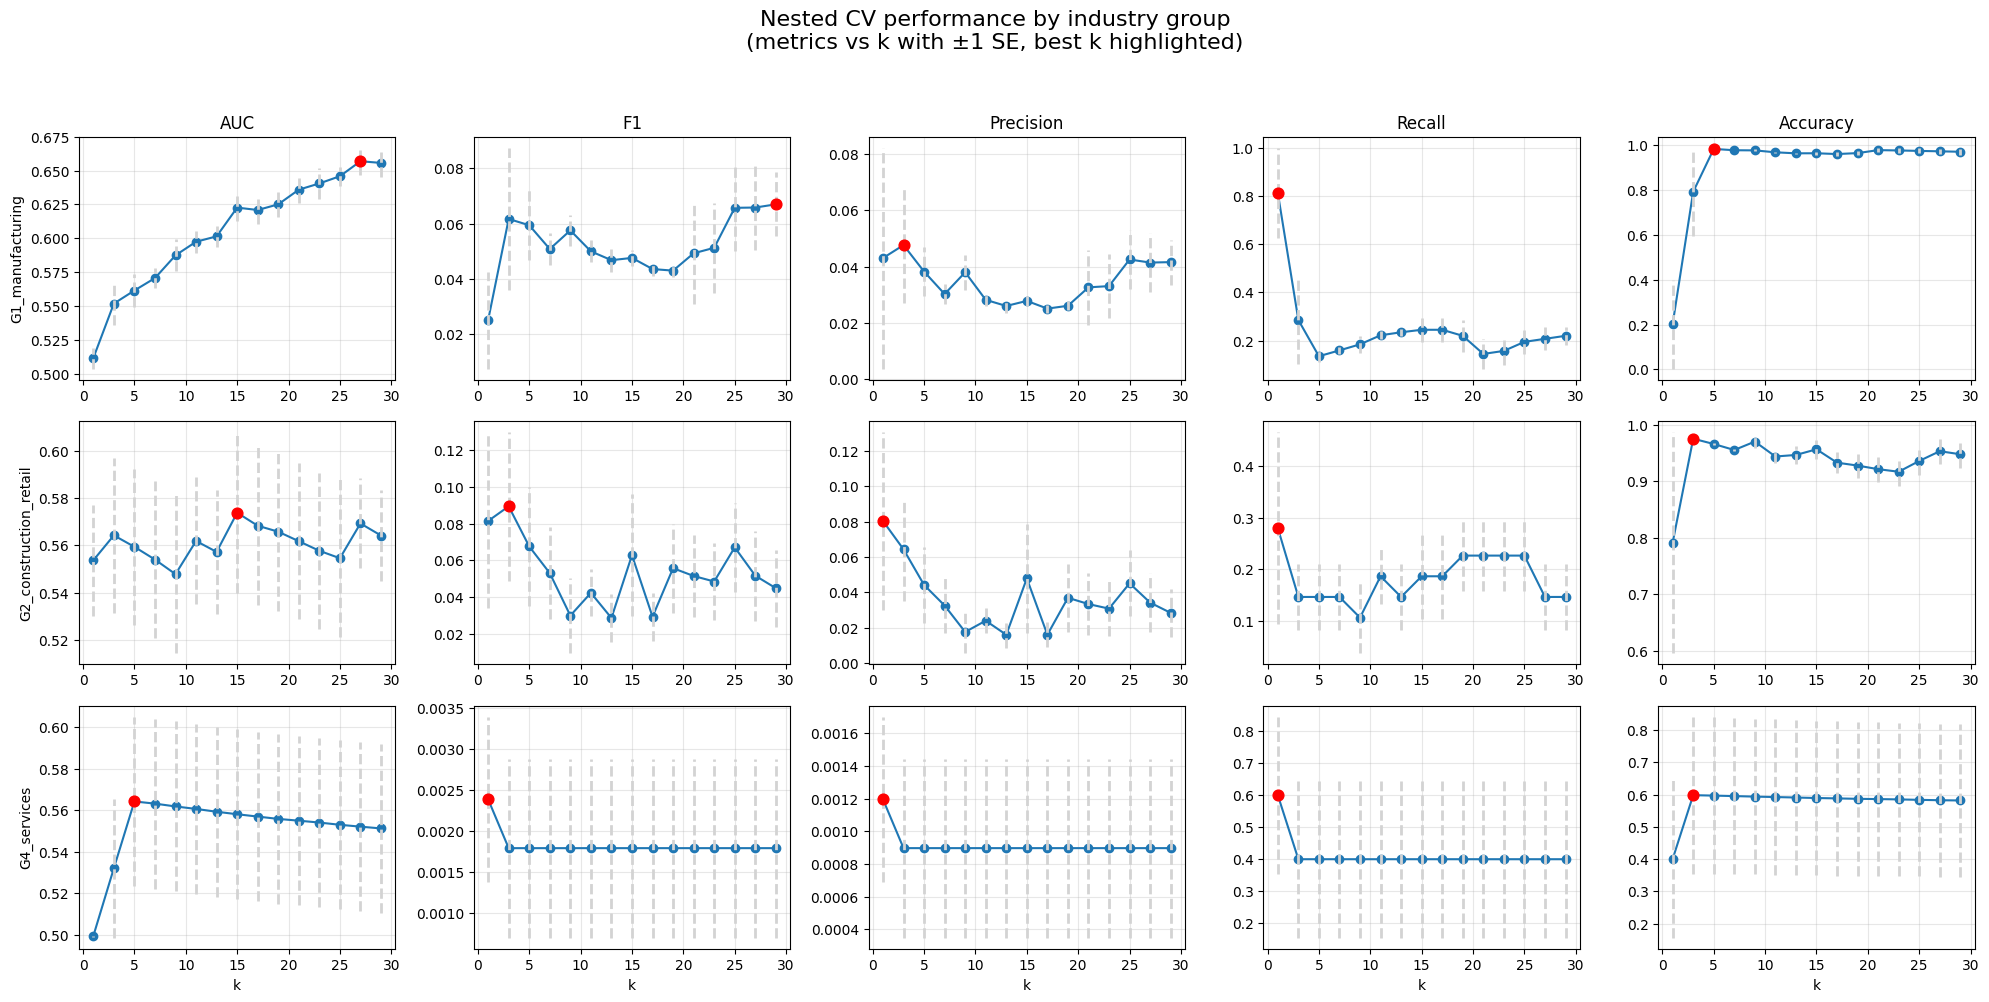

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# metrics to plot (order matters)
metric_info = [
    ("AUC",       "CV_AUC",       "CV_SE_AUC"),
    ("F1",        "CV_F1",        "CV_SE_F1"),
    ("Precision", "CV_Precision", "CV_SE_Precision"),
    ("Recall",    "CV_Recall",    "CV_SE_Recall"),
    ("Accuracy",  "CV_Acc",       "CV_SE_Acc"),
]

groups = list(group_results.keys())
n_groups = len(groups)
n_metrics = len(metric_info)

fig, axes = plt.subplots(
    n_groups, n_metrics,
    figsize=(4*n_metrics, 3.5*n_groups),
    # sharex="col"
)

# ensure axes is 2D even if n_groups == 1
if n_groups == 1:
    axes = np.expand_dims(axes, axis=0)

for i, g in enumerate(groups):
    df = group_results[g].sort_values("k").copy()

    for j, (name, mcol, secol) in enumerate(metric_info):
        ax = axes[i, j]

        # main curve
        ax.plot(df["k"], df[mcol], marker="o")

        # ±1 SE bars
        for _, row in df.iterrows():
            if not np.isnan(row[mcol]) and not np.isnan(row[secol]):
                ax.vlines(
                    x=row["k"],
                    ymin=row[mcol] - row[secol],
                    ymax=row[mcol] + row[secol],
                    colors="lightgray",
                    linestyles="dashed",
                    linewidth=2
                )

        # best k marker (max metric)
        idx_best = df[mcol].idxmax()
        k_best = int(df.loc[idx_best, "k"])
        m_best = float(df.loc[idx_best, mcol])
        ax.scatter(k_best, m_best, color="red", s=60, zorder=5)

        # labels
        if i == 0:
            ax.set_title(name)
        if j == 0:
            ax.set_ylabel(g)
        if i == n_groups - 1:
            ax.set_xlabel("k")

        ax.grid(True, alpha=0.3)

fig.suptitle(
    "Nested CV performance by industry group\n(metrics vs k with ±1 SE, best k highlighted)",
    fontsize=16
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [176]:
groups = chosen_df["group"].tolist()

cms = {}  # store confusion matrices if you want later

for g in groups:
    # subset test data for this group
    te_g = test_df[
        (test_df["industry_group"] == g)
    ].dropna(subset=feature_cols + [TARGET_COL]).copy()

    if len(te_g) == 0:
        print(f"Group {g}: no test data, skipping.")
        continue

    X_te = te_g[feature_cols].to_numpy()
    y_te = te_g[TARGET_COL].to_numpy().astype(int)

    scaler, model, thr = final_models[g]

    X_te_s = scaler.transform(X_te)
    p_te = model.predict_proba(X_te_s)[:, 1]
    y_hat = (p_te >= thr).astype(int)

    cm = confusion_matrix(y_te, y_hat, labels=[0, 1])
    cms[g] = cm

    print(f"\nGroup {g} confusion matrix (TEST):")
    print(cm)


for g, cm in cms.items():
    tn, fp, fn, tp = cm.ravel()
    rec = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    pre = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    print(f"{g}: Recall={rec:.3f}, Precision={pre:.3f}")


Group G2_construction_retail confusion matrix (TEST):
[[3232   42]
 [   0   26]]

Group G1_manufacturing confusion matrix (TEST):
[[21230   292]
 [   44    37]]

Group G4_services confusion matrix (TEST):
[[6676    0]
 [   0   13]]
G2_construction_retail: Recall=1.000, Precision=0.382
G1_manufacturing: Recall=0.457, Precision=0.112
G4_services: Recall=1.000, Precision=1.000


G2_construction_retail: Recall=1.000, Precision=0.382
G1_manufacturing: Recall=0.457, Precision=0.112
G4_services: Recall=1.000, Precision=1.000


In [95]:
# ============================================================
# 2) HELPERS
# ============================================================
def threshold_for_target_recall(y_true, probs, target=0.20):
    """Highest threshold such that recall >= target. If impossible, return 1.0."""
    ts = np.unique(probs)
    for t in ts[::-1]:
        y_hat = (probs >= t).astype(int)
        if recall_score(y_true, y_hat, zero_division=0) >= target:
            return float(t)
    return 1.0

def se(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if len(x) <= 1:
        return np.nan
    return float(np.std(x, ddof=1) / np.sqrt(len(x)))

def best_k_for_metric(df, mcol):
    """Return largest k among ties for max metric."""
    tmp = df[["k", mcol]].dropna()
    m_best = tmp[mcol].max()
    k_best = int(tmp.loc[tmp[mcol] == m_best, "k"].max())
    return k_best, float(m_best)


In [96]:
# ============================================================
# 3) NESTED CV FOR ONE GROUP
# ============================================================
def nested_cv_over_k(X, y, k_values, target_recall=0.20,
                     n_splits_outer=5, n_splits_inner=3, random_state=42):
    """
    For a given (X,y) subset:
      - Outer CV evaluates
      - Inner CV (inside outer train) chooses threshold for recall constraint
    Returns:
      results_df: per-k mean metrics + SE across outer folds + threshold mean/sd
      outer_details: per-(k,outer_fold) metrics and thresholds
    """
    outer_cv = StratifiedKFold(n_splits=n_splits_outer, shuffle=True, random_state=random_state)

    outer_details = []
    results = []
    se_rows = []

    for k in k_values:
        outer_fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}
        outer_fold_thresholds = []

        for outer_fold, (tr_outer_idx, val_outer_idx) in enumerate(outer_cv.split(X, y), start=1):
            X_tr_outer, X_val_outer = X[tr_outer_idx], X[val_outer_idx]
            y_tr_outer, y_val_outer = y[tr_outer_idx], y[val_outer_idx]

            # -------- inner CV: choose threshold --------
            inner_cv = StratifiedKFold(n_splits=n_splits_inner, shuffle=True, random_state=random_state)
            inner_thresholds = []

            for tr_inner_idx, cal_inner_idx in inner_cv.split(X_tr_outer, y_tr_outer):
                X_tr_inner, X_cal = X_tr_outer[tr_inner_idx], X_tr_outer[cal_inner_idx]
                y_tr_inner, y_cal = y_tr_outer[tr_inner_idx], y_tr_outer[cal_inner_idx]

                scaler = StandardScaler()
                X_tr_inner_s = scaler.fit_transform(X_tr_inner)
                X_cal_s      = scaler.transform(X_cal)

                model = KNeighborsClassifier(n_neighbors=k)
                model.fit(X_tr_inner_s, y_tr_inner)

                p_cal = model.predict_proba(X_cal_s)[:, 1]
                thr = threshold_for_target_recall(y_cal, p_cal, target=target_recall)
                inner_thresholds.append(thr)

            thr_outer = float(np.mean(inner_thresholds))
            outer_fold_thresholds.append(thr_outer)

            # -------- outer evaluation --------
            scaler = StandardScaler()
            X_tr_outer_s  = scaler.fit_transform(X_tr_outer)
            X_val_outer_s = scaler.transform(X_val_outer)

            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_tr_outer_s, y_tr_outer)

            p_val = model.predict_proba(X_val_outer_s)[:, 1]
            y_hat = (p_val >= thr_outer).astype(int)

            acc = accuracy_score(y_val_outer, y_hat)
            rec = recall_score(y_val_outer, y_hat, zero_division=0)
            pre = precision_score(y_val_outer, y_hat, zero_division=0)
            f1  = f1_score(y_val_outer, y_hat, zero_division=0)
            try:
                auc = roc_auc_score(y_val_outer, p_val)
            except ValueError:
                auc = np.nan

            outer_fold_metrics["acc"].append(acc)
            outer_fold_metrics["recall"].append(rec)
            outer_fold_metrics["precision"].append(pre)
            outer_fold_metrics["f1"].append(f1)
            outer_fold_metrics["auc"].append(auc)

            outer_details.append({
                "k": k,
                "outer_fold": outer_fold,
                "thr": thr_outer,
                "val_acc": acc,
                "val_recall": rec,
                "val_precision": pre,
                "val_f1": f1,
                "val_auc": auc
            })

        # means across outer folds
        row_mean = {
            "k": k,
            "CV_Acc": float(np.nanmean(outer_fold_metrics["acc"])),
            "CV_Recall": float(np.nanmean(outer_fold_metrics["recall"])),
            "CV_Precision": float(np.nanmean(outer_fold_metrics["precision"])),
            "CV_F1": float(np.nanmean(outer_fold_metrics["f1"])),
            "CV_AUC": float(np.nanmean(outer_fold_metrics["auc"])),
            "Thr_Mean": float(np.mean(outer_fold_thresholds)),
            "Thr_SD": float(np.std(outer_fold_thresholds, ddof=1)) if len(outer_fold_thresholds) > 1 else np.nan
        }
        results.append(row_mean)

        # SE across outer folds
        row_se = {
            "k": k,
            "CV_SE_Acc": se(outer_fold_metrics["acc"]),
            "CV_SE_Recall": se(outer_fold_metrics["recall"]),
            "CV_SE_Precision": se(outer_fold_metrics["precision"]),
            "CV_SE_F1": se(outer_fold_metrics["f1"]),
            "CV_SE_AUC": se(outer_fold_metrics["auc"]),
        }
        se_rows.append(row_se)

    results_df = pd.DataFrame(results).merge(pd.DataFrame(se_rows), on="k", how="left")
    results_df = results_df.sort_values("k").reset_index(drop=True)

    return results_df, pd.DataFrame(outer_details)


In [97]:
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

In [98]:
# ============================================================
# 4) PREP: add naics2 + industry_group to train/test
# ============================================================
def add_industry_group(df):
    df = df.copy()
    # naicsh may be float, convert carefully
    df["naics2"] = (pd.to_numeric(df["naicsh"], errors="coerce") // 100).astype("Int64")
    df["industry_group"] = df["naics2"].apply(assign_group)
    return df

# ---- EXPECTED: you already have train_df and test_df loaded ----
train_df = add_industry_group(train_df)
test_df  = add_industry_group(test_df)

# keep only rows we can map to a group
train_df = train_df.dropna(subset=["industry_group"]).reset_index(drop=True)
test_df  = test_df.dropna(subset=["industry_group"]).reset_index(drop=True)

In [99]:
# ============================================================
# 5) RUN THE FRAMEWORK: per-industry nested CV over k
# ============================================================
all_group_results = []
group_results_dict = {}   # store each group's per-k table
group_outer_dict = {}     # store each group's per-fold details

for g in industry_map.keys():
    df_g = train_df.loc[train_df["industry_group"] == g].copy()

    # drop NA in features/target consistently
    needed = feature_cols + [target_col]
    df_g = df_g.dropna(subset=needed).reset_index(drop=True)

    y_g = df_g[target_col].to_numpy().ravel()
    X_g = df_g[feature_cols].to_numpy()

    n = len(df_g)
    pos = int(np.sum(y_g == 1))
    neg = int(np.sum(y_g == 0))
    pos_rate = float(np.mean(y_g)) if n > 0 else np.nan

    print("\n" + "="*70)
    print(f"{g}: n={n}, positives={pos}, negatives={neg}, default_rate={pos_rate:.44f}")
    print("="*70)

    # sanity checks
    if pos < min_pos_total:
        print(f"SKIP {g}: too few positives (<{min_pos_total}).")
        continue
    if pos < n_splits_outer * min_pos_per_fold:
        print(f"WARNING {g}: positives may be too few per outer fold; results may be unstable.")

    results_df_g, outer_details_g = nested_cv_over_k(
        X_g, y_g,
        k_values=k_values,
        target_recall=target_recall,
        n_splits_outer=n_splits_outer,
        n_splits_inner=n_splits_inner,
        random_state=random_state
    )

    # store
    results_df_g["industry_group"] = g
    group_results_dict[g] = results_df_g
    group_outer_dict[g] = outer_details_g

    # pick best k by F1 (you can change to AUC/Precision/etc.)
    k_best_f1, best_f1 = best_k_for_metric(results_df_g, "CV_F1")
    thr_best = float(results_df_g.loc[results_df_g["k"] == k_best_f1, "Thr_Mean"].iloc[0])

    all_group_results.append({
        "industry_group": g,
        "n": n,
        "positives": pos,
        "default_rate": pos_rate,
        "k_best_F1": k_best_f1,
        "CV_F1_best": best_f1,
        "thr_mean_at_k_best": thr_best
    })

summary_by_group = pd.DataFrame(all_group_results).sort_values("industry_group").reset_index(drop=True)
summary_by_group


G1_manufacturing: n=4444, positives=13, negatives=4431, default_rate=0.00292529252925292524920020120760000281734392


NameError: name 'min_pos_total' is not defined